# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Problem Statement: Tourism Package Adoption

<font color=darkblue>A reputed tourism company is planning to launch a long term travel package. The Product Manager has access to the existing customer's data and information. He wishes to analyse the trend of existing customers to figure out which customer is going to purchase the long term travel package.</font>
    
### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Data Dictionary:

| Serial NO. | Variables       | Descritpion                                                              |
| :--------- | :-------------- | :----------------------------------------------------------------------- |
| 1. | CustomerID              | Unique customer ID                                                       |
| 2. | ProdTaken               | Product taken flag                                                       |
| 3. | Age                     | Age of customer                                                          |
| 4. | PreferredLoginDevice    | Preferred login device of customer in last month                         |
| 5. | CityTier	               | City tier                                                                |
| 6. | DurationOfPitch         | Duration of pitch by a sales man to customer                             |
| 7. | Occupation	           | Occupation of customer                                                   |
| 8. | Gender                  | Gender of customer                                                       |
| 9. | NumberOfPersonVisited   | Total number of person came with customer                                |
| 10.| NumberOfFollowups       | Total number of follow up has been done by sales person after sales pitch|
| 11.| ProductPitched	       | Product pitched by sales person                                          |
| 12.| PreferredPropertyStar   | Preferred hotel property rating by customer                              |
| 13.| MaritalStatus           | Marital status of customer                                               |
| 14.| NumberOfTrips	       | Average number of trip in a year by customer                             |
| 15.| Passport	               | Customer passport flag                                                   |
| 16.| PitchSatisfactionScore  | Sales pitch satisfactory score                                           |
| 17.| OwnCar                  | Customers owns a car flag                                                |
| 18.| NumberOfChildrenVisited | Total number of children visit with customer                             |
| 19.| Designation	           | Designation of customer in current organization                          |
| 20.| MonthlyIncome	       | Gross monthly income of customer                                         |


## Index

- <a href = #link1>Overview of the dataset</a>


- <a href = #link2>Fixing Data-types</a>


- <a href = #link3>EDA</a> 


- <a href = #link4>Missing value Detection and Treatment</a>


- <a href = #link5>Data Imbalance</a> 


- <a href = #link6>Encode and Split the dataset</a>


- <a href = #link7> Model Building, Model Evaluation, Model Tuning and Ensemble Modelling </a> 


- <a href = #link8> Model Building without hyper-parameter tuning </a> 


- <a href = #link9> 1a. Logistic Regression without hyper-parameter tuning</a> 


- <a href = #link10> 1b. LDA without hyper-parameter tuning </a> 


- <a href = #link11> 1c. Decision tree without hyper-parameter tuning </a> 


- <a href = #link12> 1d. Random Forest without hyper-parameter tuning </a> 


- <a href = #link13> 2a. Logistic Regression with hyper-parameter tuning </a> 


- <a href = #link14> 2b. Decision tree with hyper-parameter tuning </a> 


- <a href = #link15> 2c. Random Forest with hyper-parameter tunin </a> 


- <a href = #link16> Comparing Models with and without Tuning </a>


- <a href = #link17> Ensemble Modeling </a>


- <a href = #link18> 3a Ensemble Modeling Bagging and Boosting without tuning </a>


- <a href = #link19> 3b Ensemble Modeling Bagging and Boosting with tuning </a>


- <a href = #link20> Interpretation of the most optimum model and its implication on the Business </a>


## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"><a id = "link1"></a> Overview of the dataset 

### Import necessary Libraries

In [1]:
# Import Neccessary packages
import os

# supress warnings
import warnings
warnings.filterwarnings('ignore')

# For Bold printing
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

#Importing Libraries
import numpy as np # Numerical libraries
import pandas as pd # to handle data in form of rows and columns 
from pandas_profiling import ProfileReport # Automate EDA

# For Visualisation-import ploting libraries
# To enable plotting graphs within Jupyter notebook
import matplotlib.pyplot as plt
%matplotlib inline
#importing seaborn for statistical plots
import seaborn as sns
# The following code is to set the subsequent figure sizes
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7

# To Scale our data/ For preprocessing the data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale

#To check Multi-collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

#To Split data
from sklearn.model_selection import train_test_split,GridSearchCV, StratifiedKFold

# Import machine learning libraries
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix,accuracy_score
from sklearn.metrics import precision_recall_curve, auc, make_scorer, recall_score, precision_score

In [2]:
#Load the dataset with sheet_name - 'Tourism'
Tourism = pd.read_excel('Tourism.xlsx',sheet_name='Tourism')

In [3]:
# copying data to another varaible to avoid any changes to original data
df=Tourism.copy()

In [4]:
# Check head of the data
printmd('**Transpose View of top 5 rows of Tourism dataset :**')
df.head().T

**Transpose View of top 5 rows of Tourism dataset :**

,0,1,2,3,4
CustomerID,200000,200001,200002,200003,200004
ProdTaken,1,0,1,0,0
Age,41,49,37,33,NaN
PreferredLoginDevice,Self Enquiry,Company Invited,Self Enquiry,Company Invited,Self Enquiry
CityTier,3,1,1,1,1
DurationOfPitch,6,14,8,9,8
Occupation,Salaried,Salaried,Free Lancer,Salaried,Small Business
Gender,Female,Male,Male,Female,Male
NumberOfPersonVisited,3,3,3,2,2
NumberOfFollowups,3,4,4,3,3


In [5]:
# Check tail of the data
printmd('**Transpose View of bottom 5 rows of Tourism dataset :**')
df.tail().T

**Transpose View of bottom 5 rows of Tourism dataset :**

,4883,4884,4885,4886,4887
CustomerID,204883,204884,204885,204886,204887
ProdTaken,1,1,1,1,1
Age,49,28,52,19,36
PreferredLoginDevice,Self Enquiry,Company Invited,Self Enquiry,Self Enquiry,Self Enquiry
CityTier,3,1,3,3,1
DurationOfPitch,9,31,17,16,14
Occupation,Small Business,Salaried,Salaried,Small Business,Salaried
Gender,Male,Male,Female,Male,Male
NumberOfPersonVisited,3,4,4,3,4
NumberOfFollowups,5,5,4,4,4


In [6]:
# Shape of the data
row, col = df.shape
print("There are total {}".format(row), "Observations and {}".format(col), "variables in the dataset")

There are total 4888 Observations and 20 variables in the dataset


In [7]:
# Data Structure
printmd('**Data-structure of the variables for tourism dataset :**')
df.info()

**Data-structure of the variables for tourism dataset :**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4662 non-null   float64
 3   PreferredLoginDevice     4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

**Out of 20,7 columns are of float dtype, 6 columns are of object type and 7 are of integer type.**

* **Continuous Variables:**
    - All the 3 variables has missing values in it.
        - Age 
        - DurationofPitch
        - Monthly Income

* **Nominal Variable:**
   - CustomerID is a unique identifier which can be dropped from the dataset before model building.

* **Target Variable:**
    - ProdTaken is a target variable.
    - Binary categorical variable- 
        - 0: Product Not Taken 
        - 1: Product Taken
* **Ordinal Variable:**
    - CityTier 
        - 3 Levels (Ratings- 1,2,3)
    - PreferredPropertyStar
        - 3 Levels (Ratings-3,4,5)
        - Has Missing values in it.
    - PitchSatisfactionScore
        - 5 Levels (Ratings -1,2,3,4,5)
    - Designation
        - 5 Levels (Executive, Manager, Senior Manager, AVP and VP)
* **Categorical Variables:**
    - PreferredLoginDevice, Passport, Gender, Owncar, Occupation, NumberofPersonVisited, NumberofFollowups,
    - MaritalStatus, ProductPitched, NumberofChildrenVisited, NumberofTrips.
        

#### Understanding of attributes (variable info, renaming if required)

**Customer details:**

* CustomerID: Unique customer ID
* ProdTaken: Product taken flag
* Age: Age of customer
* Gender: Gender of customer
* MaritalStatus: Marital status of customer
* Occupation: Occupation of customer
* Designation: Designation of the customer in the current organization
* MonthlyIncome: Gross monthly income of the customer
* Passport: Customer passport flag
* OwnCar: Customers owns a car flag
* CityTier: City tier

**Customer-Preference**

* PreferredPropertyStar: Preferred hotel property rating by customer
* PreferredLoginDevice: Preferred login device of the customer in last month
* NumberOfPersonVisited: Total number of person came with customer
* NumberOfChildrenVisited: Total number of children visit with customer
* NumberOfTrips: Average number of the trip in a year by customer

**Customer interaction data:**
* DurationOfPitch: Duration of the pitch by a salesman to customer
* NumberOfFollowups: Total number of follow up has been done by sales person after sales pitch
* ProductPitched: Product pitched by a salesperson
* PitchSatisfactionScore: Sales pitch satisfactory score


## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"><a id = "link2"></a> Fixing Datatypes

In [8]:
#selecting columns with datatype as object
col_1 = df.select_dtypes(['object'])
col_1.columns

Index(['PreferredLoginDevice', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [9]:
#Converting object datatype to category
for i in col_1.columns:
    df[i] = df[i].astype('category')

In [10]:
#selecting columns which needs to be category
col_2 = df[['ProdTaken','Passport','OwnCar','CityTier','PreferredPropertyStar','PitchSatisfactionScore',
            'NumberOfPersonVisited','NumberOfChildrenVisited']]
col_2.columns

Index(['ProdTaken', 'Passport', 'OwnCar', 'CityTier', 'PreferredPropertyStar',
       'PitchSatisfactionScore', 'NumberOfPersonVisited',
       'NumberOfChildrenVisited'],
      dtype='object')

In [11]:
#Converting datatype to category
for i in col_2.columns:
    df[i] = df[i].astype('category')

## Create bins for Continuous Columns using pd.qcut or pd.cut

In [12]:
df[['Age','MonthlyIncome','DurationOfPitch','NumberOfFollowups','NumberOfTrips']].describe()

,Age,MonthlyIncome,DurationOfPitch,NumberOfFollowups,NumberOfTrips
count,4662.000000,4655.000000,4637.000000,4843.000000,4748.000000
mean,37.622265,23619.853491,15.490835,3.708445,3.236521
std,9.316387,5380.698361,8.519643,1.002509,1.849019
min,18.000000,1000.000000,5.000000,1.000000,1.000000
25%,31.000000,20346.000000,9.000000,3.000000,2.000000
50%,36.000000,22347.000000,13.000000,4.000000,3.000000
75%,44.000000,25571.000000,20.000000,4.000000,4.000000
max,61.000000,98678.000000,127.000000,6.000000,22.000000


**Creating bins using quantile cut and manual cut:**

- Bin continuous variable using pd.qcut (quantile method) and manual cut: pd.cut methos
- qcut tries to divide up the underlying data into equal sized bins.The function defines the bins using percentiles based on the distribution of the data. 

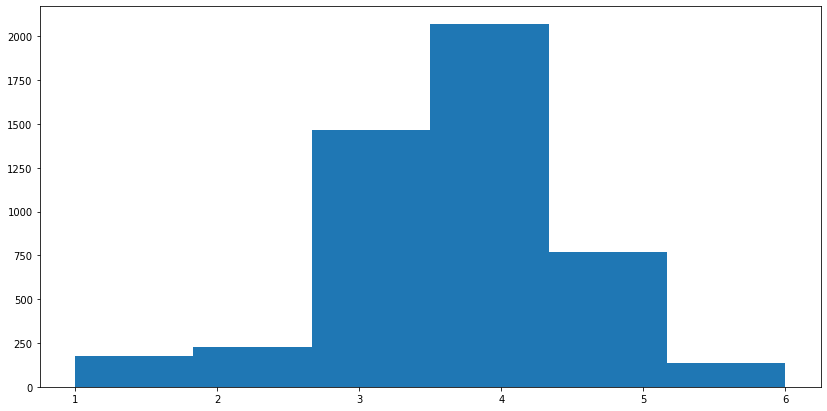

In [13]:
plt.hist(df['NumberOfFollowups'],bins=6);

In [14]:
# For Age Variable: (Since Age variable is normally distributed use qcut)
bin_labels = ['Min','Max']
df['NumberOfFollowups'] = pd.cut(df['NumberOfFollowups'], bins=[0, 3, 6], labels=bin_labels)

In [15]:
df['NumberOfFollowups'].value_counts(sort=False)

Min    1871
Max    2972
Name: NumberOfFollowups, dtype: int64

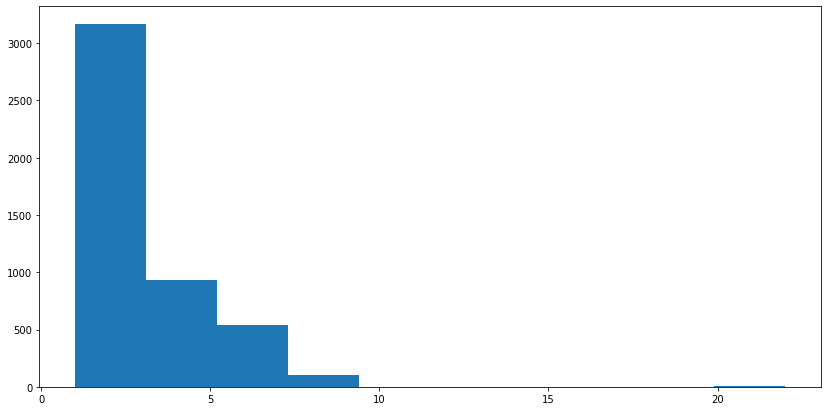

In [16]:
plt.hist(df['NumberOfTrips'],bins=10);

In [17]:
# For Age Variable: (Since Age variable is normally distributed use qcut)
bin_labels = ['Min','Avg','Max']
df['NumberOfTrips'] = pd.cut(df['NumberOfTrips'], bins=[0, 2, 5, 25], labels=bin_labels)

In [18]:
df['NumberOfTrips'].value_counts(sort=False)

Min    2084
Avg    2015
Max     649
Name: NumberOfTrips, dtype: int64

In [19]:
# Data Structure after fixing the data-types
printmd('**Data-structure of the variables for tourism dataset after fixing the data-type:**')
df.info()

**Data-structure of the variables for tourism dataset after fixing the data-type:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   CustomerID               4888 non-null   int64   
 1   ProdTaken                4888 non-null   category
 2   Age                      4662 non-null   float64 
 3   PreferredLoginDevice     4863 non-null   category
 4   CityTier                 4888 non-null   category
 5   DurationOfPitch          4637 non-null   float64 
 6   Occupation               4888 non-null   category
 7   Gender                   4888 non-null   category
 8   NumberOfPersonVisited    4888 non-null   category
 9   NumberOfFollowups        4843 non-null   category
 10  ProductPitched           4888 non-null   category
 11  PreferredPropertyStar    4862 non-null   category
 12  MaritalStatus            4888 non-null   category
 13  NumberOfTrips            4748 non-null   category
 14  Passport

In [20]:
# Check for Duplicate values:
dups = df.duplicated()
print('Number of duplicate rows =%d'% dups.sum())
df[dups]

Number of duplicate rows =0


,CustomerID,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome


In [21]:
# Check for Missing values:
printmd('**The number of Null values in Tourism dataset:**')
print(df.isnull().sum())

**The number of Null values in Tourism dataset:**

CustomerID                   0
ProdTaken                    0
Age                        226
PreferredLoginDevice        25
CityTier                     0
DurationOfPitch            251
Occupation                   0
Gender                       0
NumberOfPersonVisited        0
NumberOfFollowups           45
ProductPitched               0
PreferredPropertyStar       26
MaritalStatus                0
NumberOfTrips              140
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisited     66
Designation                  0
MonthlyIncome              233
dtype: int64


In [22]:
# Drop CustomerID has it a Nominal data\ unique identifier -no analysis can be done
df.drop('CustomerID',axis=1,inplace=True)

In [23]:
printmd('**Transpose View of top 5 rows of Tourism dataset after removing CustomerID:**')
df.head().T

**Transpose View of top 5 rows of Tourism dataset after removing CustomerID:**

,0,1,2,3,4
ProdTaken,1,0,1,0,0
Age,41,49,37,33,NaN
PreferredLoginDevice,Self Enquiry,Company Invited,Self Enquiry,Company Invited,Self Enquiry
CityTier,3,1,1,1,1
DurationOfPitch,6,14,8,9,8
Occupation,Salaried,Salaried,Free Lancer,Salaried,Small Business
Gender,Female,Male,Male,Female,Male
NumberOfPersonVisited,3,3,3,2,2
NumberOfFollowups,Min,Max,Max,Min,Min
ProductPitched,Super Deluxe,Super Deluxe,Multi,Multi,Multi


### Summary of the data set

In [24]:
printmd('**The Summary statistics of continuous variables before Data-cleaning:**')
round(df.describe(),2)

**The Summary statistics of continuous variables before Data-cleaning:**

,Age,DurationOfPitch,MonthlyIncome
count,4662.00,4637.00,4655.00
mean,37.62,15.49,23619.85
std,9.32,8.52,5380.70
min,18.00,5.00,1000.00
25%,31.00,9.00,20346.00
50%,36.00,13.00,22347.00
75%,44.00,20.00,25571.00
max,61.00,127.00,98678.00


In [25]:
printmd('**The Summary statistics of categorical variables before Data-cleaning:**')
df.describe(include=['category']).T

**The Summary statistics of categorical variables before Data-cleaning:**

,count,unique,top,freq
ProdTaken,4888,2,0,3968
PreferredLoginDevice,4863,2,Self Enquiry,3444
CityTier,4888,3,1,3190
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
NumberOfPersonVisited,4888,5,3,2402
NumberOfFollowups,4843,2,Max,2972
ProductPitched,4888,5,Multi,1842
PreferredPropertyStar,4862,3,3,2993
MaritalStatus,4888,4,Married,2340


**‘ProdTaken’ is our target variable. Majority of the customers have not taken the travel package.**

**Customer-Details**

* Majority of the customer belongs to 32-44 Age group. Age is a normally distributed data.
* Most of the customers are male and are married. 
* Most of the customer’s occupation type are salaried and their designation is executive and belongs to Average income group(15000 to 40000). Need to deal with few Outliers.
* Most of the customers do not have a passport.
* Most of the customers have their own car.
* Most of the customers are from City-Tier 1.

**Customer-Preference**

* Most of the customer preferred 3 star rating property.
* Most of the customers came into the company's contact by doing a self-Enquiry and number of person visited along with customer is 3, also the number of children visited along with customer is 1.
* Average number of trips in a year by most of the customers is minimum that is either 1 or 2.

**Customer-Interaction**

* Maximum number of follow-ups have been made by sales person to most of the customers.
* Product ‘Multi’ is pitched by sales person most of the times.
* Sales pitch satisfactory score for most of the sales person is 3.
* Duration of Sales pitch to majority of the customer is average. (10 - 20 mins). Need to deal with few Outlier.

## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"><a id = "link3"></a> EDA

## Univariate Analysis

### Get unique counts of all Categorical Variables

In [26]:
# Geting unique counts of all Categorical Variables
col_3 = df.select_dtypes(['category'])
for column in col_3:
    print(column.upper(),': ',col_3[column].nunique())
    print(col_3[column].value_counts().sort_index())
    print('\n')

PRODTAKEN :  2
0    3968
1     920
Name: ProdTaken, dtype: int64


PREFERREDLOGINDEVICE :  2
Company Invited    1419
Self Enquiry       3444
Name: PreferredLoginDevice, dtype: int64


CITYTIER :  3
1    3190
2     198
3    1500
Name: CityTier, dtype: int64


OCCUPATION :  4
Free Lancer          2
Large Business     434
Salaried          2368
Small Business    2084
Name: Occupation, dtype: int64


GENDER :  3
Fe Male     155
Female     1817
Male       2916
Name: Gender, dtype: int64


NUMBEROFPERSONVISITED :  5
1      39
2    1418
3    2402
4    1026
5       3
Name: NumberOfPersonVisited, dtype: int64


NUMBEROFFOLLOWUPS :  2
Min    1871
Max    2972
Name: NumberOfFollowups, dtype: int64


PRODUCTPITCHED :  5
Deluxe           342
King             230
Multi           1842
Standard         742
Super Deluxe    1732
Name: ProductPitched, dtype: int64


PREFERREDPROPERTYSTAR :  3
3.0    2993
4.0     913
5.0     956
Name: PreferredPropertyStar, dtype: int64


MARITALSTATUS :  4
Divorced      9

* **From Gender variable, we can combine 'Fe Male' category with the 'Female' category.** 
* **From Marital status:**
    - Divorced
    - Married
    - Unmmarried ( Assuming not married but having a partner- LiveInRelationship)
    - Single
* **City-tier with Rating 2 has very few observations compared to rating 1 and 3.**
* **Under Occupation attribute, Freelancer category has only 2 observations. Also Large Business has very few observations comapred to salaried and small business.**
* **We have only 3 unique customers where 5 persons came along with the customers. Also we have very few observations where one person came along with the customer.**

#### Combining the 'Fe Male' category with 'Female' category 

In [27]:
# Check how many rows with 'Fe Male'
df[df['Gender'] == 'Fe Male']

,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
22,0,34.0,Self Enquiry,1,13.0,Salaried,Fe Male,2,Min,Standard,4.0,Unmarried,Min,0,3,1,0.0,Senior Manager,26994.0
55,0,33.0,Company Invited,1,6.0,Salaried,Fe Male,3,Min,Standard,3.0,Unmarried,Min,1,2,1,0.0,Senior Manager,28458.0
116,0,34.0,Self Enquiry,1,11.0,Small Business,Fe Male,2,Max,Standard,5.0,Unmarried,Avg,0,2,0,0.0,Senior Manager,26631.0
131,0,50.0,Company Invited,3,18.0,Small Business,Fe Male,3,Min,Standard,3.0,Unmarried,Avg,0,5,0,0.0,Senior Manager,24208.0
154,0,32.0,Company Invited,3,14.0,Small Business,Fe Male,2,Min,Standard,3.0,Unmarried,Min,0,4,1,1.0,Senior Manager,23998.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,0,33.0,Company Invited,1,9.0,Salaried,Fe Male,3,Max,Super Deluxe,3.0,Unmarried,Max,1,5,1,1.0,Manager,23676.0
4810,0,32.0,Self Enquiry,1,31.0,Small Business,Fe Male,4,Max,Super Deluxe,5.0,Unmarried,Avg,0,5,1,1.0,Manager,25490.0
4811,0,60.0,Self Enquiry,3,10.0,Salaried,Fe Male,3,Max,Super Deluxe,3.0,Unmarried,Max,0,3,0,1.0,Manager,23849.0
4817,1,30.0,Company Invited,1,17.0,Salaried,Fe Male,3,Max,Multi,3.0,Unmarried,Avg,0,4,1,1.0,Executive,25301.0


In [28]:
# Replace 155 rows from 'Fe Male' to 'Female'
df['Gender'].replace({'Fe Male':'Female'}, inplace=True)

In [29]:
#checking value counts after combining 
df['Gender'].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

#### Replace Unmmaried to LiveInRelationship

In [30]:
# Unmarried ( Assuming not married but having a partner- LiveInRelationship)
# Variable transformation :Change Unmarried -> LiveInRelationship
# Check how many rows with 'Unmarried'
df[df['MaritalStatus'] == 'Unmarried']

,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
8,0,38.0,Company Invited,1,29.0,Salaried,Male,2,Max,Standard,3.0,Unmarried,Min,0,3,0,0.0,Senior Manager,24526.0
22,0,34.0,Self Enquiry,1,13.0,Salaried,Female,2,Min,Standard,4.0,Unmarried,Min,0,3,1,0.0,Senior Manager,26994.0
43,0,27.0,Company Invited,3,14.0,Salaried,Male,2,Min,Standard,3.0,Unmarried,Min,0,2,1,0.0,Senior Manager,23726.0
55,0,33.0,Company Invited,1,6.0,Salaried,Female,3,Min,Standard,3.0,Unmarried,Min,1,2,1,0.0,Senior Manager,28458.0
63,0,59.0,Self Enquiry,3,31.0,Salaried,Female,2,Min,Standard,5.0,Unmarried,Min,0,3,1,0.0,Senior Manager,22637.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4860,1,41.0,Self Enquiry,1,15.0,Small Business,Male,4,Max,Multi,3.0,Unmarried,Avg,1,4,1,3.0,Executive,27772.0
4873,1,41.0,Self Enquiry,3,14.0,Small Business,Male,3,Max,Multi,4.0,Unmarried,Avg,0,5,0,1.0,Executive,23339.0
4878,1,35.0,Self Enquiry,1,17.0,Small Business,Male,3,Max,Super Deluxe,5.0,Unmarried,Avg,0,4,0,1.0,Manager,24803.0
4883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,Max,Super Deluxe,4.0,Unmarried,Min,1,1,1,1.0,Manager,26576.0


In [31]:
# Replace 682 rows from 'Unmarried' to 'LiveInRelationship'
df['MaritalStatus'].replace({'Unmarried':'LiveInRelationship'}, inplace=True)

In [32]:
#check value counts after variable transformation 
df['MaritalStatus'].value_counts()

Married               2340
Divorced               950
Single                 916
LiveInRelationship     682
Name: MaritalStatus, dtype: int64

In [33]:
df[['Gender','MaritalStatus']].dtypes

Gender           object
MaritalStatus    object
dtype: object

In [34]:
# Again change the data-theye to category
df['Gender'] = df['Gender'].astype('category')
df['MaritalStatus'] = df['MaritalStatus'].astype('category')

In [35]:
df[['Gender','MaritalStatus']].dtypes

Gender           category
MaritalStatus    category
dtype: object

### Univariate Analysis on Categorical Variables

In [36]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
        
    plt.show() # show the plot

 #### 1.Observations on ProdTaken - Target Variable

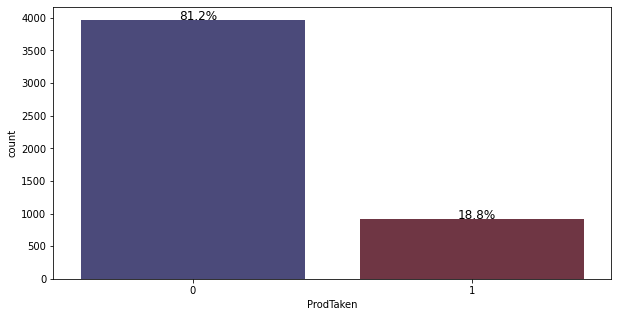

In [37]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df["ProdTaken"],palette='icefire')
perc_on_bar(ax,df["ProdTaken"])

**Only 18.8% of customers have taken the tourism package**

#### 2.Observations on Customer Details:

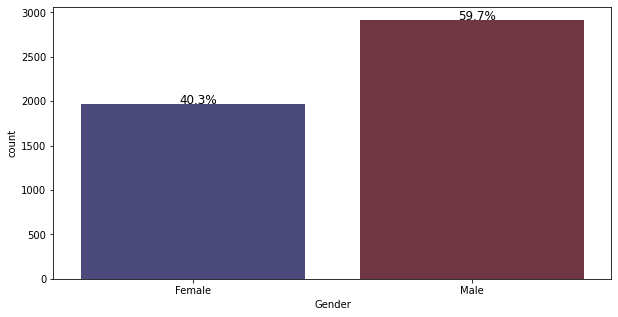

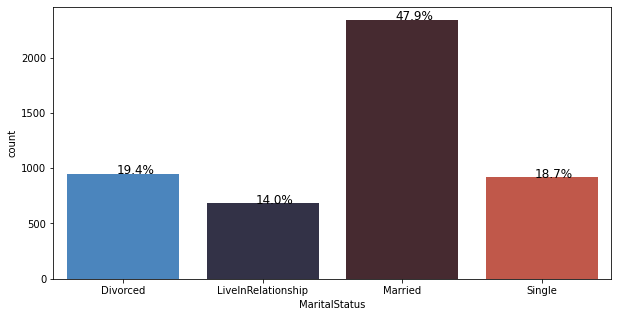

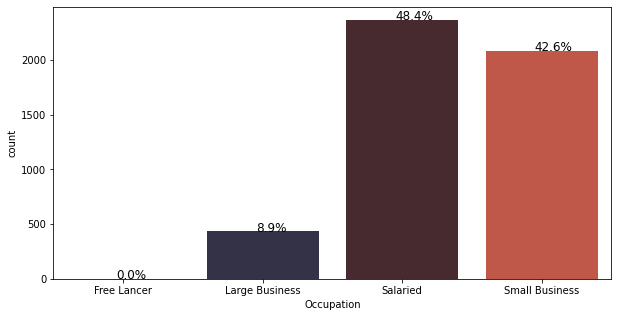

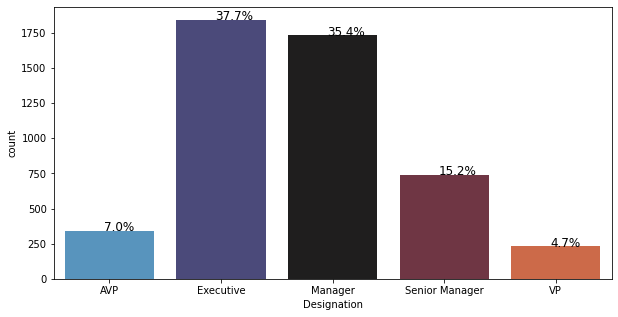

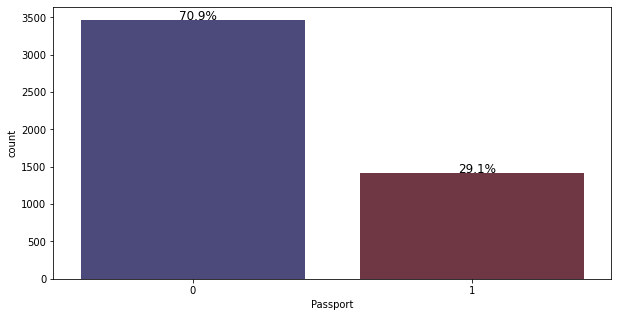

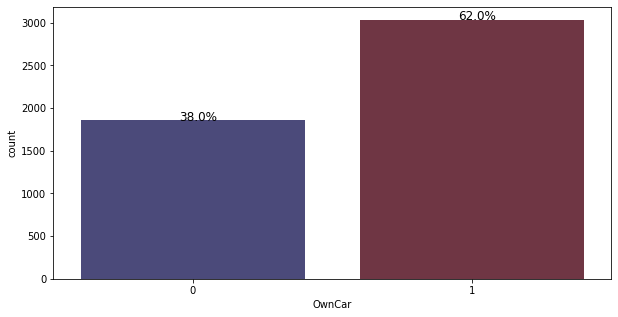

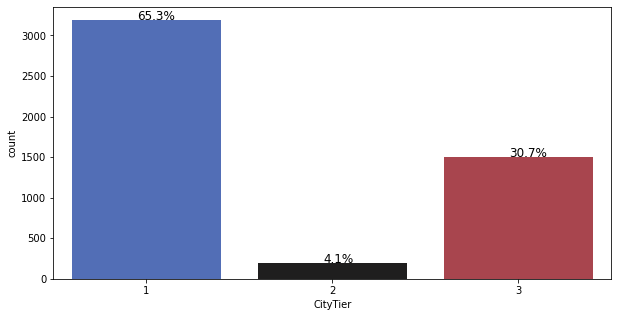

<Figure size 1008x504 with 0 Axes>

In [38]:
customer_details = df[['Gender', 'MaritalStatus', 
                       'Occupation', 'Designation',
                       'Passport', 'OwnCar', 'CityTier']]
for i in customer_details:
    plt.figure(figsize=(10,5))
    ax = sns.countplot(df[i],palette='icefire')
    perc_on_bar(ax,df[i])
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

#### 3.Observations on Customer Preference:

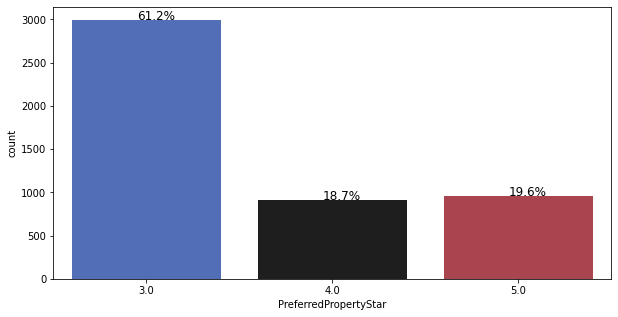

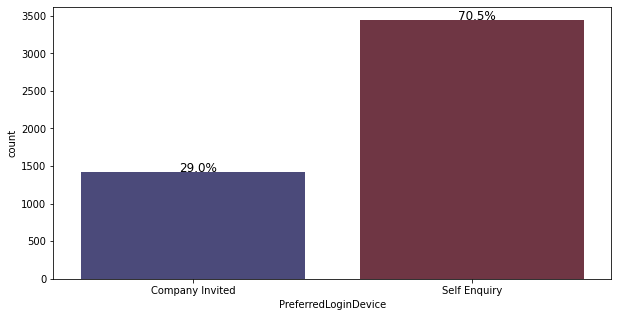

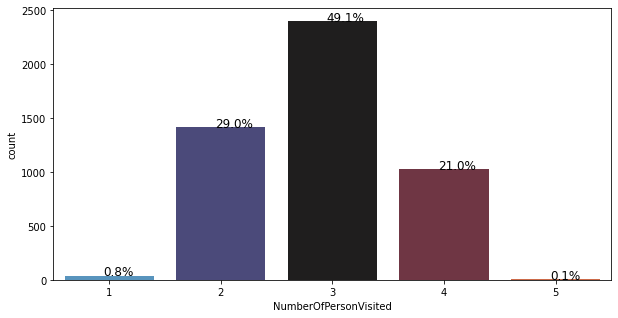

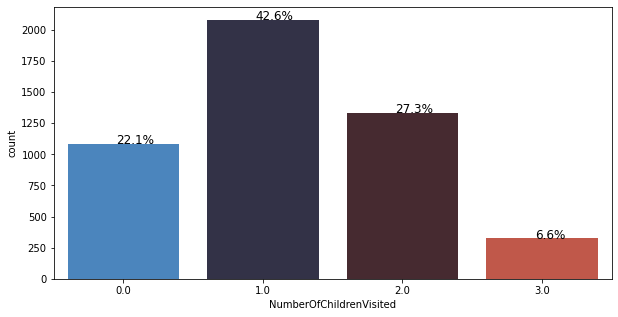

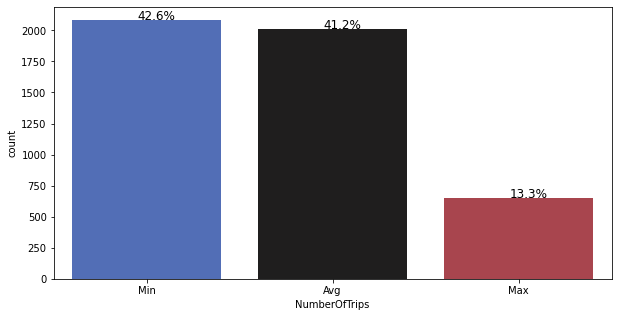

In [39]:
customer_preference = df[['PreferredPropertyStar','PreferredLoginDevice',
                         'NumberOfPersonVisited','NumberOfChildrenVisited','NumberOfTrips']]
for i in customer_preference:
    plt.figure(figsize=(10,5))
    ax = sns.countplot(df[i],palette='icefire')
    perc_on_bar(ax,df[i])

#### 3.Observations on Customer Interaction:

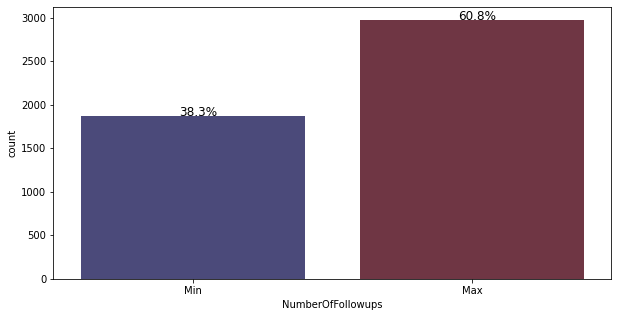

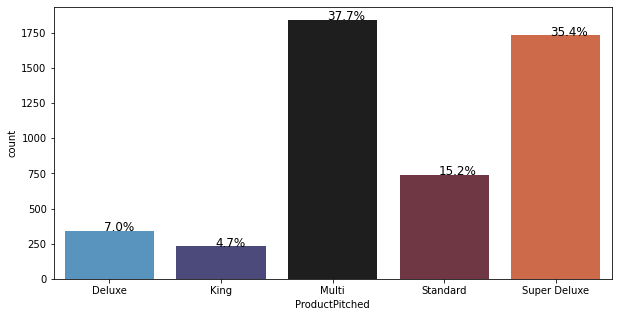

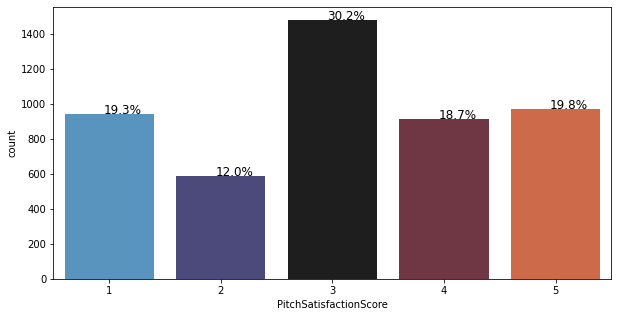

In [40]:
customer_interaction = df[['NumberOfFollowups','ProductPitched','PitchSatisfactionScore']]
for i in customer_interaction:
    plt.figure(figsize=(10,5))
    ax = sns.countplot(df[i],palette='icefire')
    perc_on_bar(ax,df[i])

### Univariate Analysis on Numerical Variables

In [41]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=False, ax=ax_hist2, bins=bins,color="green") if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color="m") # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.nanmedian(feature), color='red', linestyle='-') # Add median to the histogram

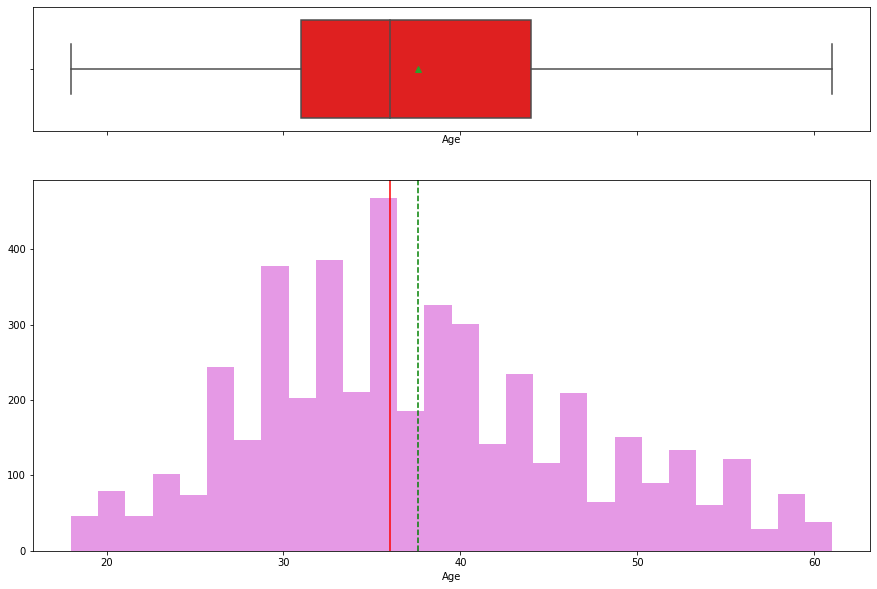

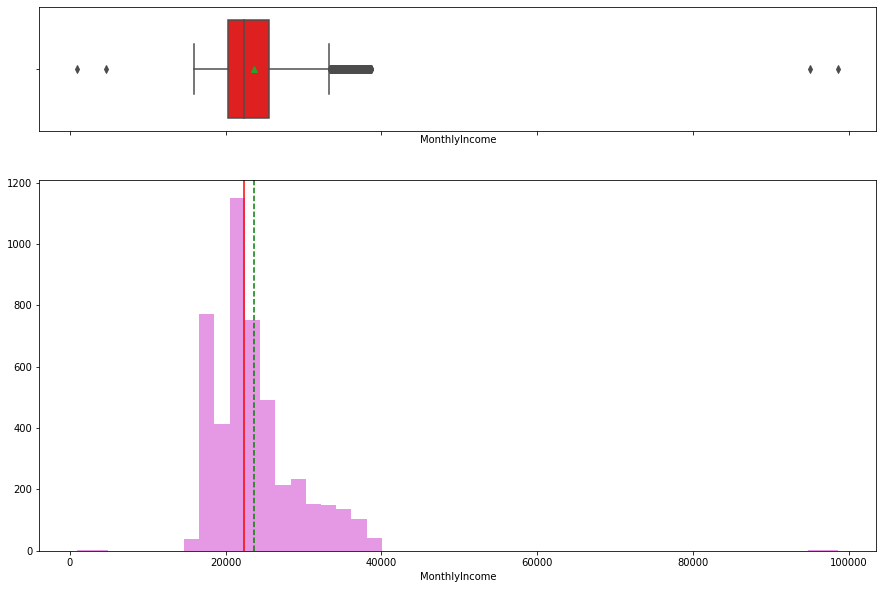

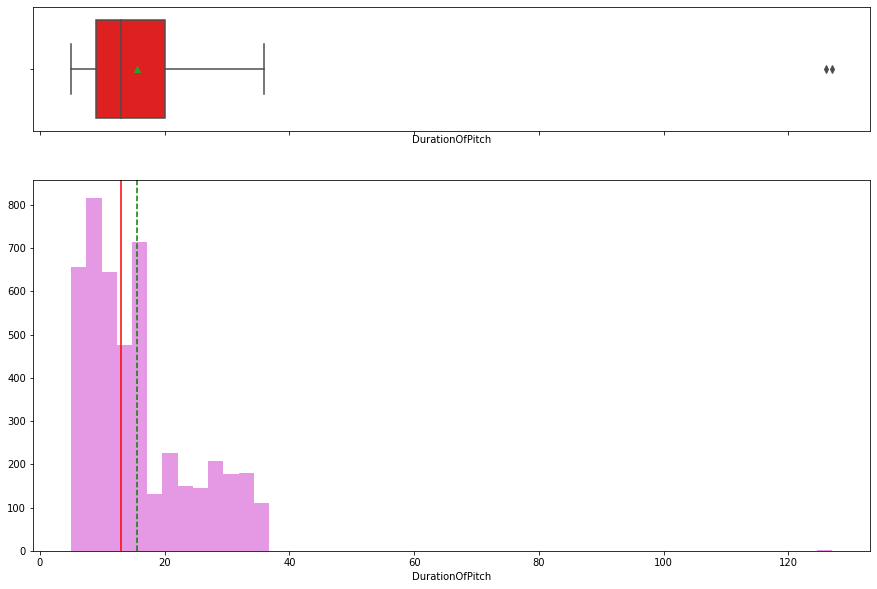

In [42]:
Numerical_col = df[['Age','MonthlyIncome','DurationOfPitch']]

for i in Numerical_col:
    histogram_boxplot(df[i])

## Summary of Univariate Analysis

**Customer Details:**

- Age variable is normally distributed.
- About 60% of the customers are male and 40% are Females.
- About 48% of the customers are married.

- Majority of the customers that is 48.4% are Salaried.About 42.6% are small business owners and about 9% are Large business owners.For Free Lancer we have only 2 customers.
- Majority of customer's designation are Executives followed by Manager's and Senior Manager's.
- Monthly Income for majority of the customer falls under the income range (15,000 to 40000). presence of outliers on both the extreme ends. need to deal with oultliers becasue those are possible values.

- 71% of them do not have passport and 62% of the customers have their own car.
- Most of the customers are from city tier 1 followed by 3 and very small percentage is from tier 2. 

**Customer-Preference**

- Majority of the customers preferred to stay at 3-star rating's property.
- 70% of them self enquired about the package.
- Minimum no.of trips (1 or 2) were taken by majority of the customers.

**Customer-Interaction**

- Duration of Sales pitch is skewed towards left need to deal with extreme right values.
- Max number of follow-ups been made by the sales team which is 4 and above for majority of the customers.
- Multi is the most pitched product followed by Super deluxe.
- Most of the customers gave score 3 for sales pitch.

## Bivariate Analysis

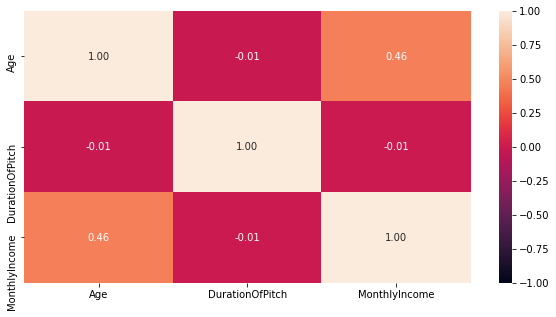

In [43]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f')
plt.show()

**Age is correlated with Monthly income, which is expected.**

### Bivariate Analysis of ProdTaken with Numerical variables

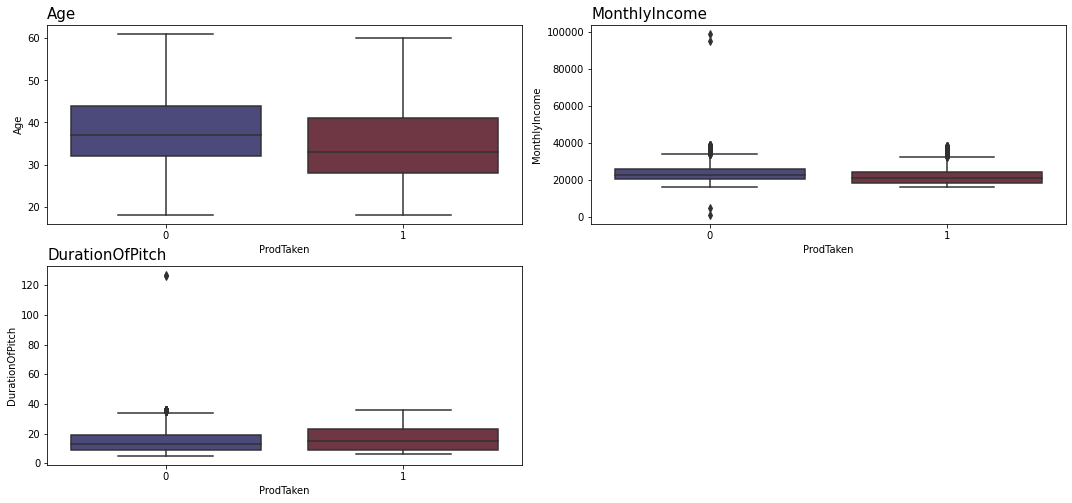

In [44]:
cols = df[['Age','MonthlyIncome','DurationOfPitch']].columns.tolist()
plt.figure(figsize=(15,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(df["ProdTaken"],df[variable],palette="icefire")
                     plt.tight_layout()
                     plt.title(variable,fontsize=15,loc='left')
plt.show()

### Bivariate Analysis of ProdTaken with categorical variables

In [45]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette='icefire')
    tab1 = pd.crosstab(x,df['ProdTaken'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df['ProdTaken'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.xticks(rotation=0,fontsize=15)
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

#### 1. Customer Details V/s target variable

ProdTaken     0    1   All
Gender                    
Female     1630  342  1972
Male       2338  578  2916
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


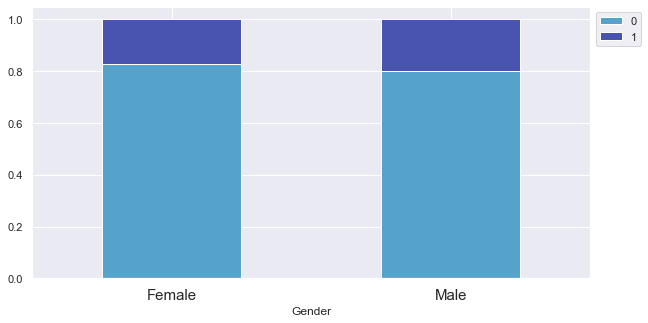

ProdTaken              0    1   All
MaritalStatus                      
Divorced             826  124   950
LiveInRelationship   516  166   682
Married             2014  326  2340
Single               612  304   916
All                 3968  920  4888
------------------------------------------------------------------------------------------------------------------------


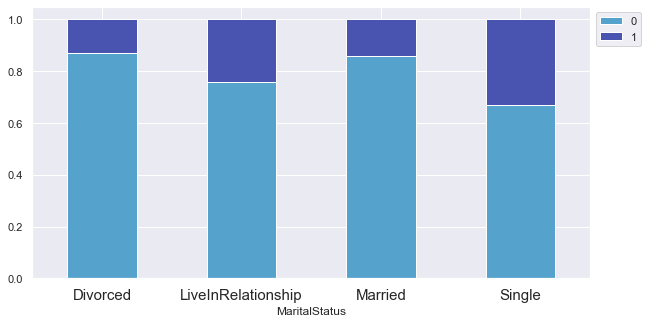

ProdTaken          0    1   All
Occupation                     
Free Lancer        0    2     2
Large Business   314  120   434
Salaried        1954  414  2368
Small Business  1700  384  2084
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


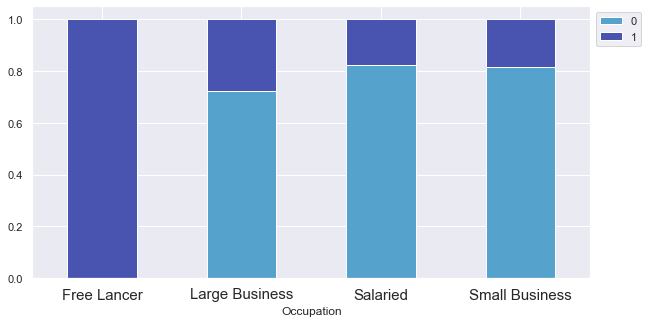

ProdTaken          0    1   All
Designation                    
AVP              322   20   342
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
VP               210   20   230
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


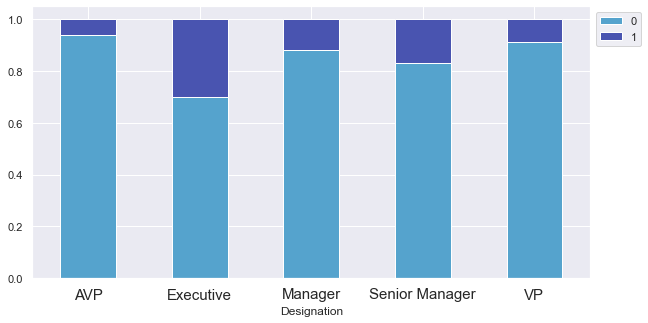

ProdTaken     0    1   All
Passport                  
0          3040  426  3466
1           928  494  1422
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


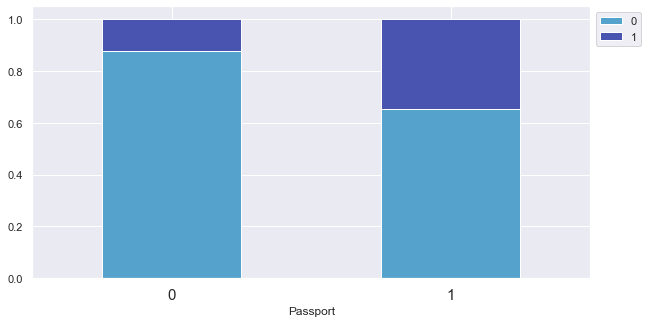

ProdTaken     0    1   All
OwnCar                    
0          1496  360  1856
1          2472  560  3032
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


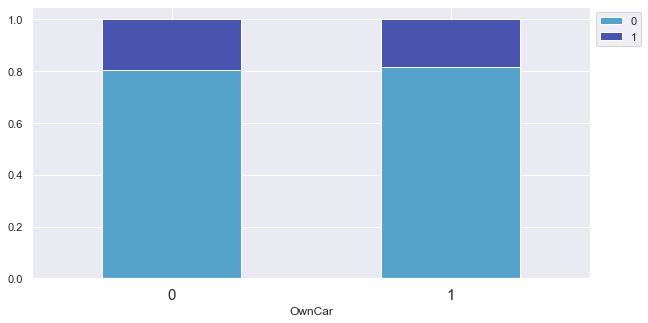

ProdTaken     0    1   All
CityTier                  
1          2670  520  3190
2           152   46   198
3          1146  354  1500
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


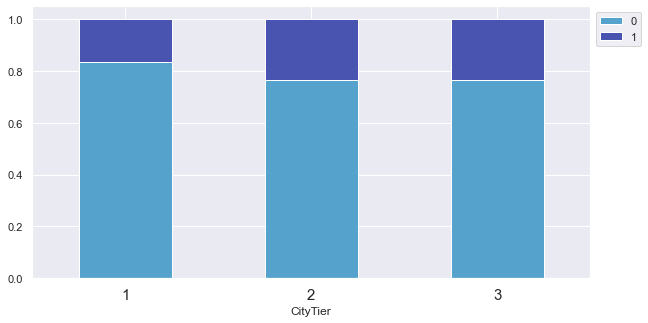

In [46]:
for i in customer_details:
    stacked_plot(df[i])

#### 2. Customer Preferrence V/s target variable

ProdTaken                 0    1   All
PreferredPropertyStar                 
3.0                    2511  482  2993
4.0                     731  182   913
5.0                     706  250   956
All                    3948  914  4862
------------------------------------------------------------------------------------------------------------------------


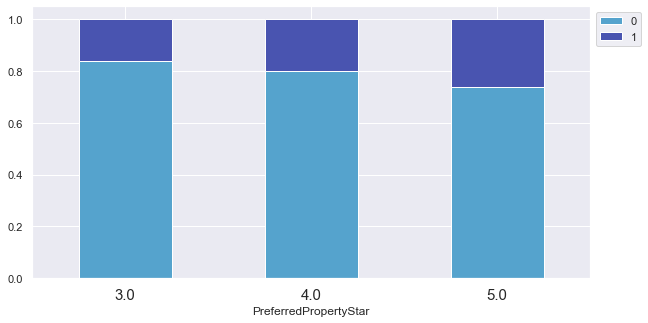

ProdTaken                0    1   All
PreferredLoginDevice                 
Company Invited       1109  310  1419
Self Enquiry          2837  607  3444
All                   3946  917  4863
------------------------------------------------------------------------------------------------------------------------


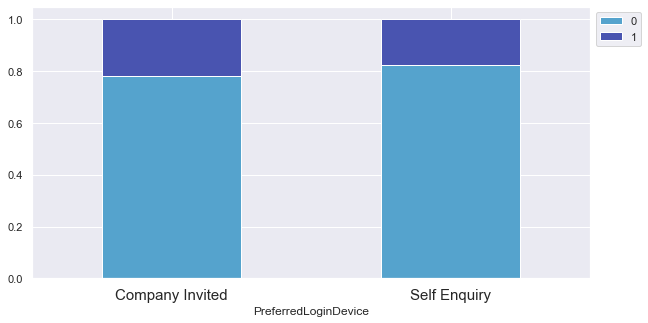

ProdTaken                 0    1   All
NumberOfPersonVisited                 
1                        39    0    39
2                      1151  267  1418
3                      1942  460  2402
4                       833  193  1026
5                         3    0     3
All                    3968  920  4888
------------------------------------------------------------------------------------------------------------------------


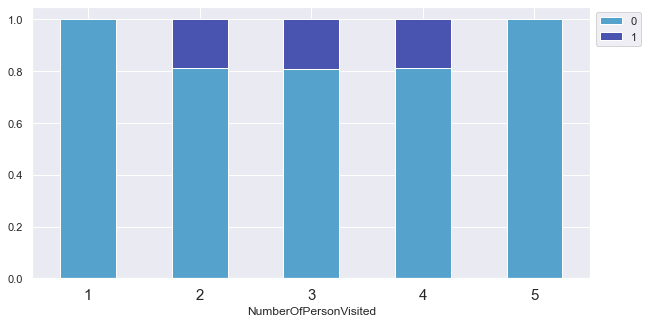

ProdTaken                   0    1   All
NumberOfChildrenVisited                 
0.0                       880  202  1082
1.0                      1688  392  2080
2.0                      1082  253  1335
3.0                       259   66   325
All                      3909  913  4822
------------------------------------------------------------------------------------------------------------------------


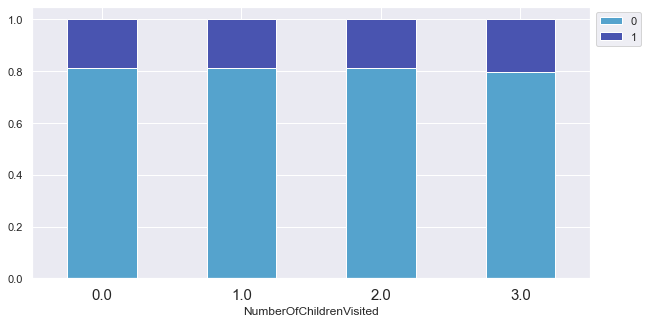

ProdTaken         0    1   All
NumberOfTrips                 
Min            1673  411  2084
Avg            1675  340  2015
Max             492  157   649
All            3840  908  4748
------------------------------------------------------------------------------------------------------------------------


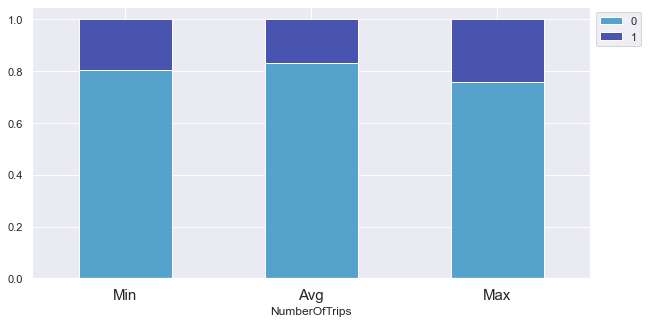

In [47]:
for i in customer_preference:
    stacked_plot(df[i])

#### 2. Customer Interaction V/s target variable

ProdTaken             0    1   All
NumberOfFollowups                 
Min                1583  288  1871
Max                2348  624  2972
All                3931  912  4843
------------------------------------------------------------------------------------------------------------------------


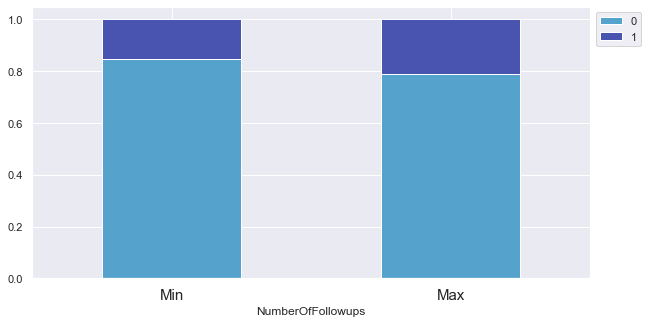

ProdTaken          0    1   All
ProductPitched                 
Deluxe           322   20   342
King             210   20   230
Multi           1290  552  1842
Standard         618  124   742
Super Deluxe    1528  204  1732
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


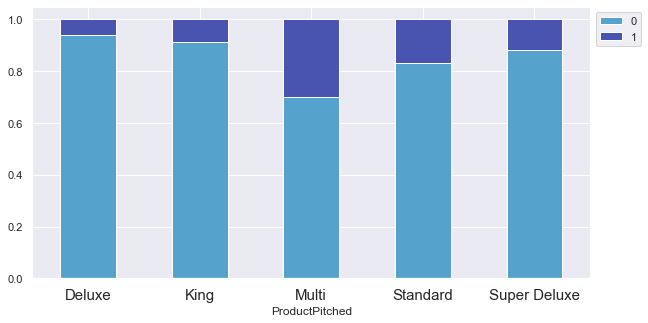

ProdTaken                  0    1   All
PitchSatisfactionScore                 
1                        798  144   942
2                        498   88   586
3                       1162  316  1478
4                        750  162   912
5                        760  210   970
All                     3968  920  4888
------------------------------------------------------------------------------------------------------------------------


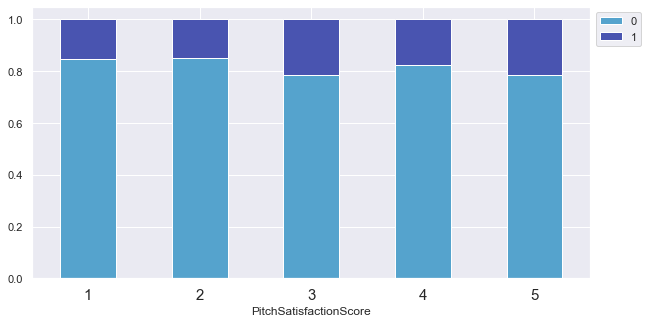

In [48]:
for i in customer_interaction:
    stacked_plot(df[i])

## Bivariate Analysis

**Customer Demographics v/s ProdTaken**

- Tourism package has been taken mostly by customers who are of less than 40 years of age.
- There is not much distinction among Male and Female customers who have purchased the travel package.
- Customers who are single  and LiveInRelationship people has purchased the travel package more than married or divorced.
- We can see that all of the customers who are Free Lancers(though we have only 2 such customers in this dataset) have purchased the product.Also those with Large Business have purchased the product.
- Customers who are in executive positions have purchased the travel package more followed by those in senior manager position.
- There isn't a much difference in the monthly income of customers who have and have not taken the package. 
- There is not much difference in purchasing travel package between customers with and without a car.
- Customers who have a passport have higher chance of purchasing the travel package than those without one.**
- Customers from city tier 2 and 3 have mostly purchased the travel package.

**Customer Preference v/s ProdTaken**

- Chances of purchasing product increases has the property rating increases.Customers who prefer 5-star property purchased travel package more.
- Most of the customers who took the travel package are those who were invited by the company to take tourism package .
- There is no difference in the purchasing travel package for customers who had 0,1,2,3 children visiting with them.
- We can see that those with 2,3,4 persons travelling with the customer has more chance of buying the travel package.Those who came with 1 and 5 persons did not buy any travel package.
- Customer who prefers to travel min(1 or 2) trips per year and max(>6) trips per year has higher chances of buying tourism package.

**Customer Interaction v/s ProdTaken**

- Package has been purchased when there is higher duration of pitch by salesman to the customer. 
- The package was purchased by those customers to whom the Multi product was pitched, followed by standard product.
- The chance of purchasing increased as the number of followups went up.With max (>4) showing good chance of the customer purchasing the package.
- Customers who have given a PitchSatisfactionScore of 3 or 5 have purchased the travel package more.

**Bivariate Analysis.**

- Age is correlated with Monthly income, which is expected.




## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"><a id = "link4"></a> Missing value and Outlier Detection and Treatment

### Outlier Treatment

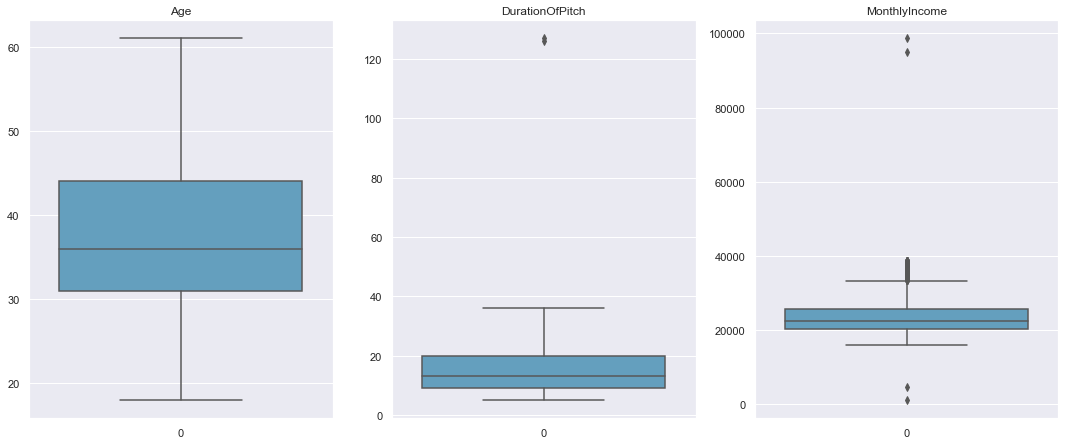

In [49]:
# outlier detection using boxplot
plt.figure(figsize=(20,30))

for i, variable in enumerate(['Age','DurationOfPitch','MonthlyIncome']):
                     plt.subplot(5,4,i+1)
                     sns.boxplot(data=df[variable], orient="v")
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

In [50]:
# Check DurationOfPitch extreme values
df[['ProdTaken','DurationOfPitch']].sort_values(by=["DurationOfPitch"],ascending = False).head()

,ProdTaken,DurationOfPitch
3878,0,127.0
1434,0,126.0
2796,0,36.0
2868,0,36.0
2648,1,36.0


* **We can see couple of values 127 and 126 but those are possible values because the duration can get extended due to several reasons.**
* **For this particular case study, our class of interest is customers who has purchased product from the company. Even after sales pitch duration of 127 and 126, customers did not purchase the product.**
* **We will convert those values to median of durationOf pitch value.**

In [51]:
# Replace 126 and 127 by median of DurationOfPitch : 13
df['DurationOfPitch'].replace({126.0:13,127.0:13},inplace=True)

In [52]:
# Verify durationOfPitch
df[df['DurationOfPitch'] > 36]

,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome


In [53]:
# Check MonthlyIncome upper extreme values
df[['ProdTaken','MonthlyIncome']].sort_values(by=["MonthlyIncome"],ascending = False).head()

,ProdTaken,MonthlyIncome
2482,0,98678.0
38,0,95000.0
4104,0,38677.0
2634,0,38677.0
4660,0,38651.0


In [54]:
# Check MonthlyIncome Lower extreme values
df[['ProdTaken','MonthlyIncome']].sort_values(by=["MonthlyIncome"],ascending = True).head()

,ProdTaken,MonthlyIncome
142,0,1000.0
2586,0,4678.0
513,1,16009.0
1983,1,16009.0
2197,0,16051.0


**Monthly Income of 98678.0 and 95000.0 is an outlier and can be a possible value and these customers have not taken product, since our class of interest is product taken we will convert this values to median of Monthly Income.**

**Monthly Income of 1000.0 and 4678.0 can be a possible value and these customers have not taken product, since our class of interest is product taken we can convert this values to median of Monthly Income.**

In [55]:
# Replace 98678, 95000 by median of MonthlyIncome : 22347
df['MonthlyIncome'].replace({98678.0:22347.0,95000.0:22347.0,1000.0:22347.0,4678.0:22347.0},inplace=True)

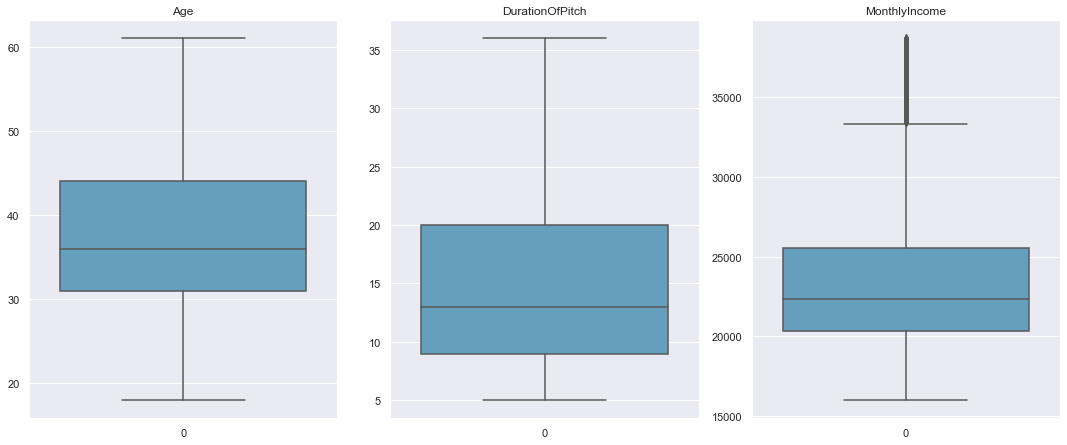

In [56]:
# outlier detection using boxplot after Outlier Treatment
plt.figure(figsize=(20,30))

for i, variable in enumerate(['Age','DurationOfPitch','MonthlyIncome']):
                     plt.subplot(5,4,i+1)
                     sns.boxplot(data=df[variable], orient="v")
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

* **Age and DurationOfPitch do not have any Outliers.**
* **Monthly Income has few outliers even after Outlier treatment and we found 341 observation were above the upper whisker, these values are possible values. As of now we keep it has it is and do not treat them.**

#### Missing Value Treatment

In [57]:
df.isnull().sum()

ProdTaken                    0
Age                        226
PreferredLoginDevice        25
CityTier                     0
DurationOfPitch            251
Occupation                   0
Gender                       0
NumberOfPersonVisited        0
NumberOfFollowups           45
ProductPitched               0
PreferredPropertyStar       26
MaritalStatus                0
NumberOfTrips              140
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisited     66
Designation                  0
MonthlyIncome              233
dtype: int64

**We can see that we have missing values for the columns** 

- Age and Monthly Income.
- PreferredLoginDevice, PreferredPropertyStar, Number of trips and NumberOfChildrenVisited.
- Duration of pitch and NumberOfFollowups.

#### Impute Missing values :  using median and mode(highest occuring value) of the feature

In [58]:
missing_cols = df[['PreferredLoginDevice','PreferredPropertyStar','NumberOfTrips','NumberOfFollowups']]
for i in missing_cols:
    j = df[i].mode()[0] 
    df[i]=df[i].fillna(j)

#### Impute Missing Values NumberofChildrenVisited: 

* **For NumberofChildrenVisited, assuming Children visited is missing because no children accompanied these customers so we will fill the missing values with 0.**

In [59]:
df['NumberOfChildrenVisited'] = df['NumberOfChildrenVisited'].fillna(0)

#### Impute Missing values for Age column

In [60]:
# We'll impute these missing values one by one, by taking median Age for Males and Females,
# using the Designation
df.groupby(["Designation", "Gender"], as_index=False)["Age"].median().T

,0,1,2,3,4,5,6,7,8,9
Designation,AVP,AVP,Executive,Executive,Manager,Manager,Senior Manager,Senior Manager,VP,VP
Gender,Female,Male,Female,Male,Female,Male,Female,Male,Female,Male
Age,48,49,32,32,37,36,38,39,50,47


In [61]:
# Impute missing Age with median value
df["Age"] = df.groupby(["Designation", "Gender"])["Age"].transform(
    lambda x: x.fillna(x.median()))

#### Impute Missing values for DurationOfPitch column

In [62]:
#We will impute the missing value for DurationOfPitch using the median value 
df['DurationOfPitch'].median()

13.0

In [63]:
# Impute missing Duration of Pitch with median value
df['DurationOfPitch']=df['DurationOfPitch'].fillna(13)

#### Impute Missing values for MonthlyIncome column

In [64]:
#MonthlyIncome 
df.groupby(["Occupation"], as_index=False)["MonthlyIncome"].median().T

,0,1,2,3
Occupation,Free Lancer,Large Business,Salaried,Small Business
MonthlyIncome,18929,21881,22130,22689


In [65]:
# Impute missing Monthly Income
df["MonthlyIncome"] = df.groupby(["Occupation"])["MonthlyIncome"].transform(
    lambda x: x.fillna(x.median()))

In [66]:
df.isnull().sum()

ProdTaken                  0
Age                        0
PreferredLoginDevice       0
CityTier                   0
DurationOfPitch            0
Occupation                 0
Gender                     0
NumberOfPersonVisited      0
NumberOfFollowups          0
ProductPitched             0
PreferredPropertyStar      0
MaritalStatus              0
NumberOfTrips              0
Passport                   0
PitchSatisfactionScore     0
OwnCar                     0
NumberOfChildrenVisited    0
Designation                0
MonthlyIncome              0
dtype: int64

**There are no more missing values found.**

In [67]:
printmd('**The Summary statistics of continuous variables after Outlier and Missing value treatment:**')
round(df.describe(),2)

**The Summary statistics of continuous variables after Outlier and Missing value treatment:**

,Age,DurationOfPitch,MonthlyIncome
count,4888.00,4888.00,4888.00
mean,37.44,15.32,23538.66
std,9.15,8.01,5026.86
min,18.00,5.00,16009.00
25%,31.00,9.00,20486.75
50%,36.00,13.00,22347.00
75%,43.00,19.00,25407.75
max,61.00,36.00,38677.00


In [68]:
printmd('**The Summary statistics of categorical variables after Missing value treatment:**')
df.describe(include=['category']).T

**The Summary statistics of categorical variables after Missing value treatment:**

,count,unique,top,freq
ProdTaken,4888,2,0,3968
PreferredLoginDevice,4888,2,Self Enquiry,3469
CityTier,4888,3,1,3190
Occupation,4888,4,Salaried,2368
Gender,4888,2,Male,2916
NumberOfPersonVisited,4888,5,3,2402
NumberOfFollowups,4888,2,Max,3017
ProductPitched,4888,5,Multi,1842
PreferredPropertyStar,4888,3,3,3019
MaritalStatus,4888,4,Married,2340


**Summary of Outliers and Missing Value Treatment**

- Monthly Income and Duration of sales pitch had few outliers.
- Duration of sales pitch had 2 records with 126 and 127 mins seems to be a data glitch or might be a genuine reason, these values were removed and treated using median.
- Monthly income had very low and very high income and found they have not purchased product, those values were manually removed and treated.
- Even after removal we left with outliers and we have treated them has they are possible values.
- Categorical variables were filled with modal values.
- Numerical variables were filled with median values.

### Multivariate Analysis

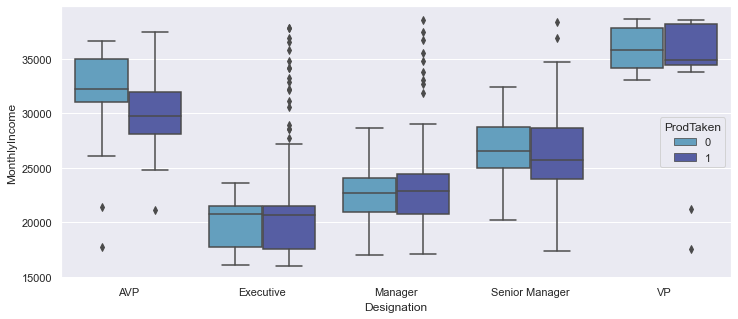

In [69]:
#DurationOfPitch v/s ProductPitched and hue=ProdTaken:
fig_dims = (12, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(y=df['MonthlyIncome'],x=df['Designation'],hue=df['ProdTaken'],ax=ax)
plt.show()

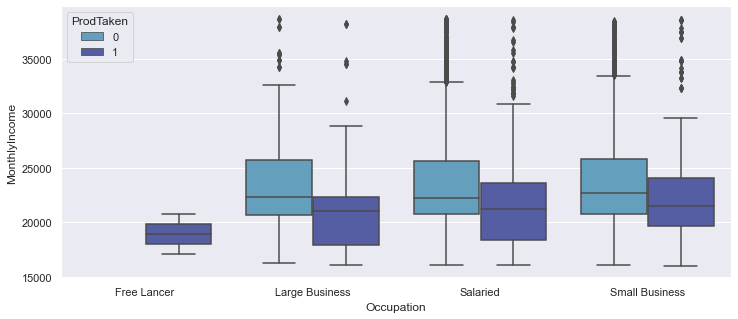

In [70]:
#DurationOfPitch v/s ProductPitched and hue=ProdTaken:
fig_dims = (12, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(y=df['MonthlyIncome'],x=df['Occupation'],hue=df['ProdTaken'],ax=ax)
plt.show()

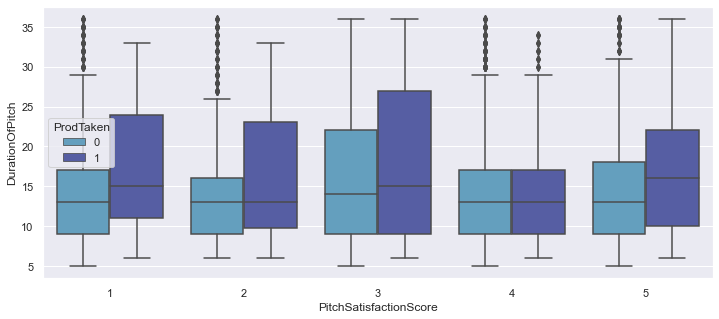

In [71]:
#DurationOfPitch v/s ProductPitched and hue=ProdTaken:
fig_dims = (12, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(y=df['DurationOfPitch'],x=df['PitchSatisfactionScore'],hue=df['ProdTaken'],ax=ax)
plt.show()

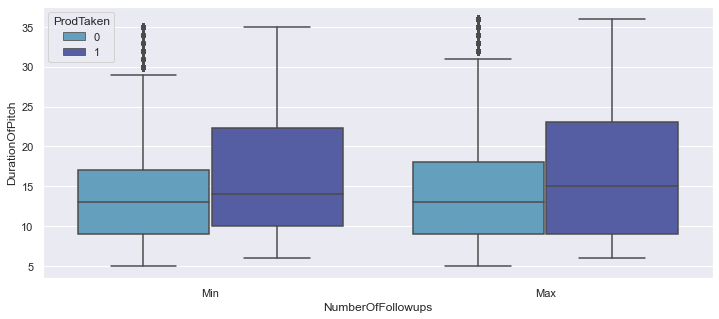

In [72]:
#DurationOfPitch v/s NumberofFollowups and hue=ProdTaken:
fig_dims = (12, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(y=df['DurationOfPitch'],x=df['NumberOfFollowups'],hue=df['ProdTaken'],ax=ax)
plt.show()

**Multivariate Analysis**

* **Monthly Income is high whose designation is AVP and VP.**
* **As the designation position changes from low level to high level, monthly income also increases.Hence there is a correlation between Monthly Income and Designation.**
* **buying pattern for VP and AVP most of the customers did not prefer to buy.** 
* **Majority of the customers across different levels of occupation falls under the monthly income range less than 25000 and most of them did not prefer to buy.**
* **Pitch satisfactory score with 1 and 5 might be data glitch majority of the customers might assume one being highest and also few might believe 5 being highest hence both seems to have higher chances of buying the package. This could be due to confusion created in ratings.**
* **With the increase in duration of sales pitch and with the increase in number of follow-ups the chances of buying tourism package increases.**

## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> <a id = "link5"></a> Data Imbalance

#### Is the data unbalanced? If so, what can be done? Please explain in the context of the business 

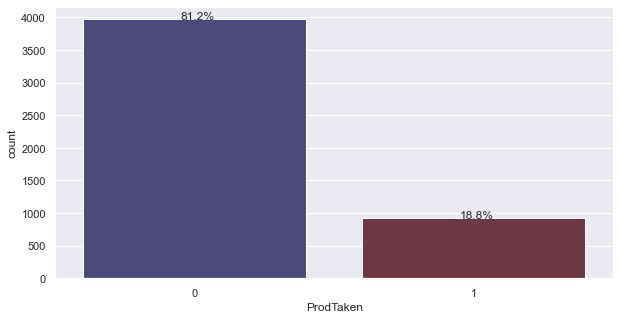

In [73]:
# Let us look at the target column which is 'ProdTaken' to understand how the data is distributed amongst the various values
plt.figure(figsize=(10,5))
ax = sns.countplot(df["ProdTaken"],palette='icefire')
perc_on_bar(ax,df["ProdTaken"])

In [74]:
df.ProdTaken.value_counts(normalize=True)

0    0.811784
1    0.188216
Name: ProdTaken, dtype: float64

* **Distribution of Target variable is 81:19**
* **Most of the customers did not buy tourism package.**
* **Since we have a significant imbalance in the distribution of the target classes, we will use stratified sampling to ensure that relative class frequencies are approximately preserved in train and test sets.** 

## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> <a id = "link6"></a> Encode and Split the dataset

* We have a significant imbalance in the distribution of the target classes, we will use stratified sampling to ensure that relative class frequencies are approximately preserved in train and test sets. 
* For that we will use the `stratify` parameter in the train_test_split function.
* For few object variables data encoding needs to be done before building models. Certain models cannot handle strings, only numeric values should be there for tree based algorithm, distance based algorithms. 
* Since we have less than 10,000 observations we will choose to split the data into train and test sets in 70:30 ratio.
* We are not building Model based on  'NumberOfPersonVisited','NumberOfChildrenVisited' along with customer.So we drop them from our predictor variables. 

In [75]:
# Copy all the predictor variables into X dataframe
X = df.drop(['ProdTaken','NumberOfPersonVisited','NumberOfChildrenVisited'],axis=1)
# Encode the data using dummy variables
X = pd.get_dummies(X,drop_first=True)
# Copy target into the y dataframe. 
y = df['ProdTaken']

In [76]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1,stratify=y)

In [77]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (3421, 32)
Number of rows and columns of the training set for the dependent variable: (3421,)
Number of rows and columns of the test set for the independent variables: (1467, 32)
Number of rows and columns of the test set for the dependent variable: (1467,)


In [78]:
y_train.value_counts(1)

0    0.811751
1    0.188249
Name: ProdTaken, dtype: float64

In [79]:
y_test.value_counts(1)

0    0.811861
1    0.188139
Name: ProdTaken, dtype: float64

## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"><a id = "link7"></a> Model Building, Model Evaluation, Model Tuning and Ensemble Modelling

#### Defining function to provide metric scores(accuracy,recall and precision) on train and test set and a function to show confusion matrix

In [80]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    train_acc = round(model.score(X_train,y_train),2)
    test_acc = round(model.score(X_test,y_test),2)
    a.append(train_acc) # adding train accuracy to list
    a.append(test_acc) # adding test accuracy to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Accuracy on training set : ",round(model.score(X_train,y_train),2))
        print("Accuracy on test set : ",round(model.score(X_test,y_test),2))
    
    return a # returning the list with train and test scores

In [81]:
##  Function to calculate precision score
def get_precision_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = round(metrics.precision_score(y_train,pred_train),2)
    test_precision = round(metrics.precision_score(y_test,pred_test),2)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Precision on training set : ",round(metrics.precision_score(y_train,pred_train),2))
        print("Precision on test set : ",round(metrics.precision_score(y_test,pred_test),2))

    return b # returning the list with train and test scores

In [82]:
##  Function to calculate recall score
def get_recall_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = round(metrics.recall_score(y_train,pred_train),2)
    test_recall = round(metrics.recall_score(y_test,pred_test),2)
    c.append(train_recall) # adding train recall to list 
    c.append(test_recall) # adding test recall to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Recall on training set : ",round(metrics.recall_score(y_train,pred_train),2))
        print("Recall on test set : ",round(metrics.recall_score(y_test,pred_test),2))
    
    return c # returning the list with train and test scores

In [83]:
##  Function to calculate F1 score
def get_f1_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    d = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_f1 = round(metrics.f1_score(y_train,pred_train),2)
    test_f1 = round(metrics.f1_score(y_test,pred_test),2)
    d.append(train_f1) # adding train F1 to list 
    d.append(test_f1) # adding test F1 to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("F1_score on training set : ",round(metrics.f1_score(y_train,pred_train),2))
        print("F1_score on test set : ",round(metrics.f1_score(y_test,pred_test),2))
    
    return d # returning the list with train and test scores

In [84]:
##  Function to calculate auc score
def get_auc_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    e = [] # defining an empty list to store train and test results
    pred_train = model.predict_proba(X_train)
    pred_train = pred_train[:, 1]
    pred_test = model.predict_proba(X_test)
    pred_test = pred_test[:, 1]
    train_auc = round(metrics.roc_auc_score(y_train,pred_train),2)
    test_auc = round(metrics.roc_auc_score(y_test,pred_test),2)
    e.append(train_auc) # adding train auc to list 
    e.append(test_auc) # adding test auc to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("AUC_score on training set : ",round(metrics.roc_auc_score(y_train,pred_train),2))
        print("AUC_score on test set : ",round(metrics.roc_auc_score(y_test,pred_test),2))
    
    return e # returning the list with train and test scores

In [85]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,cmap='Blues_r',fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [86]:
def get_roc_curve(model):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    # predict probabilities
    y_predict_prob = model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    y_predict_prob = y_predict_prob[:,1]
    # calculate roc curve
    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_predict_prob)
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(test_fpr, test_tpr)
    plt.xlabel('Test False Positive Rate')
    plt.ylabel('Test True Positive Rate')
    plt.title('ROC')
    plt.show()

# Model evaluation criterion

* **Customer purchased package and model predicted customer will purchase travel package :  True Positive (observed=1,predicted=1)**

* **Customer did not purchase package and model predicted customer will purchase travel package  : False Postive (observed=0,predicted=1)**

* **Customer didnot purchase package and model predicted customer will not purchase travel package : True Negative (observed=0,predicted=0)**

* **Customer purchased package and model predicted customer will not purchase travel package  : False Negative (observed=1,predicted=0)**

## Model can make wrong predictions as:

- Predicting a customer will purchase travel package but the customer ultimately does not purchase the package. Type-1 error or false positive. (Actual=0, predicted=1).

- Predicting a customer will not purchase travel package but the customer purchases the travel package. Type-2 error or false negative. (Actual=1, predicted=0).

### Which case is more important? 

- Type-2 error needs to be reduced. In order to do so Recall needs to be increased. If Recall increases, Sales will increase and it will bring good revenue to the company.

- Type 1 error anyhow we know those customer will not buy the plan but if due to our model miss if we target those customer it is good if there's even 10-20% conversion rate.(so not a issue).

### Model Tuning using Grid Search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"><a id = "link8"></a> Model Building without tuning parameters

**Build Following models:**

1. **Logistic Regression**
2. **Linear Discriminant Analysis**
3. **Decision tree**
4. **Random Forest**

## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"><a id = "link9"></a> 1a.Logistic Regression without hyper-parameter tuning

### Model Building - Logistic Regression

In [87]:
# Initialise a Logistic Regression without passing any hyperparameters:
Lr = LogisticRegression(class_weight = 'balanced', random_state=1)
Lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=1)

### Model Evaluation - Performance Metric

**LR Confusion Matrix for Test set:**

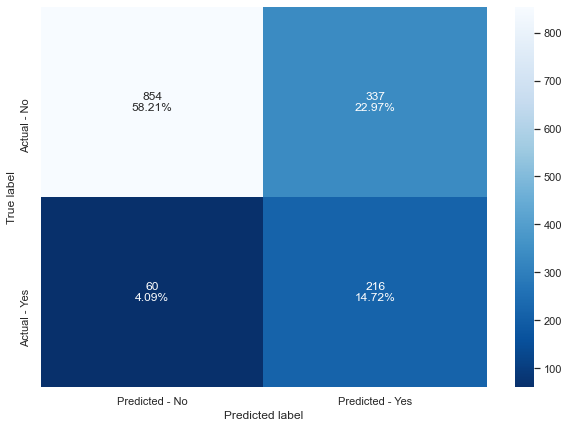

In [88]:
# LR confusion matrix for test set
printmd('**LR Confusion Matrix for Test set:**')
make_confusion_matrix(Lr,y_test)

In [89]:
printmd('**LR Performance Metrics for Train and Test set:**')
LR_acc = get_accuracy_score(Lr)
LR_precision = get_precision_score(Lr)
LR_recall = get_recall_score(Lr)
LR_f1_score = get_f1_score(Lr)
LR_auc_score = get_auc_score(Lr)

**LR Performance Metrics for Train and Test set:**

Accuracy on training set :  0.71
Accuracy on test set :  0.73
Precision on training set :  0.36
Precision on test set :  0.39
Recall on training set :  0.72
Recall on test set :  0.78
F1_score on training set :  0.48
F1_score on test set :  0.52
AUC_score on training set :  0.79
AUC_score on test set :  0.82


**LR ROC_Curve for Test set:**

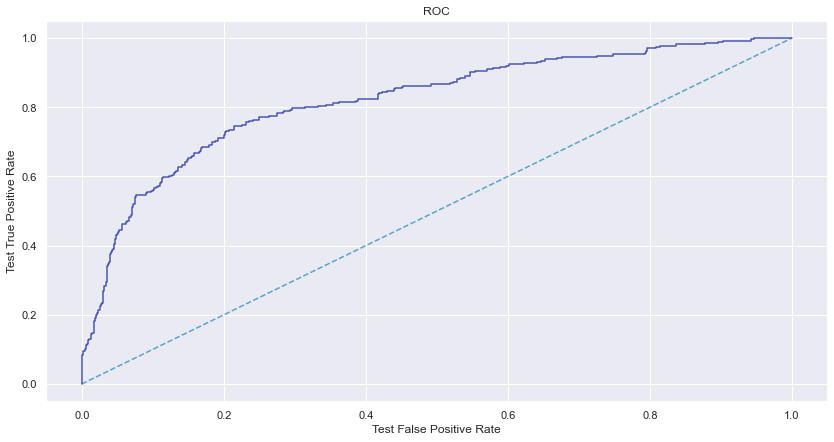

In [90]:
printmd('**LR ROC_Curve for Test set:**')
get_roc_curve(Lr)

### Model Interpretation

**For Logistic regression overall model Accuracy is good, but has a very low precision.**

## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"><a id = "link10"></a> 1b. LDA without hyper-parameter tuning

### Model Building - LDA

In [91]:
#Build LDA Model
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train,y_train)

LinearDiscriminantAnalysis()

### Model Evaluation - Performance Metric

**LDA Confusion Matrix for Test set:**

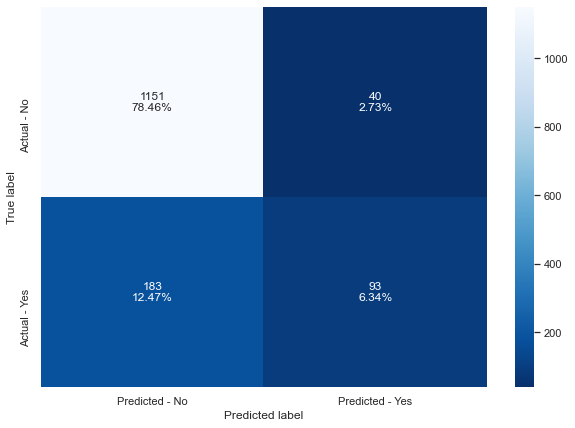

In [92]:
# LR confusion matrix for test set
printmd('**LDA Confusion Matrix for Test set:**')
make_confusion_matrix(LDA,y_test)

In [93]:
printmd('**LDA Performance Metrics for Train and Test set:**')
LDA_acc = get_accuracy_score(LDA)
LDA_precision = get_precision_score(LDA)
LDA_recall = get_recall_score(LDA)
LDA_f1_score = get_f1_score(LDA)
LDA_auc_score = get_auc_score(LDA)

**LDA Performance Metrics for Train and Test set:**

Accuracy on training set :  0.84
Accuracy on test set :  0.85
Precision on training set :  0.67
Precision on test set :  0.7
Recall on training set :  0.33
Recall on test set :  0.34
F1_score on training set :  0.44
F1_score on test set :  0.45
AUC_score on training set :  0.8
AUC_score on test set :  0.83


**LR ROC_Curve for Test set:**

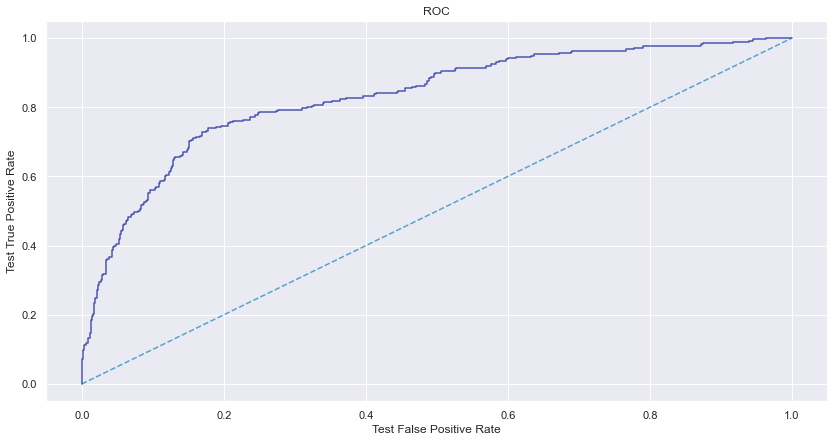

In [94]:
printmd('**LR ROC_Curve for Test set:**')
get_roc_curve(LDA)

### Model Interpretation

**For LDA model accuracy and precision is good. But recall has a verry low score**

## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"><a id = "link11"></a> 1c. Decision tree without hyper-parameter tuning

### Model Building

* **Build DecisionTreeClassifier using default 'gini' criteria to split and class_weight = 'balanced'** 
* **Do not pass any hyperparameter tuning.**

In [95]:
# Initialise a Decision Tree Classifier without passing any hyperparameters:
DTC_model = DecisionTreeClassifier(criterion = 'gini', class_weight = 'balanced', random_state=1)

# Fit the model:
DTC_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

In [96]:
Char_label = ['No', 'Yes']
Tourism_Tree_File = open('Tourism_Tree_File.dot','w')
dot_data = tree.export_graphviz(DTC_model, 
                                out_file=Tourism_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(Char_label))

Tourism_Tree_File.close()

The above code will save a .dot file in your working directory.  
WebGraphviz is Graphviz in the Browser.   
Copy paste the contents of the file into the link below to get the visualization     
http://webgraphviz.com/

In [97]:
# Training Data Class Prediction with a cut-off value of 0.5
ytrain_predict_dtcl = DTC_model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
ytest_predict_dtcl = DTC_model.predict(X_test)

In [98]:
# Top 10 Variable Importance
printmd('**Top 10 Feature Importance for DecisionTree**')
print (pd.DataFrame(DTC_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False).head(10))

**Top 10 Feature Importance for DecisionTree**

                                       Imp
Age                               0.156686
DurationOfPitch                   0.137679
MonthlyIncome                     0.121348
Passport_1                        0.084898
ProductPitched_Multi              0.053470
Gender_Male                       0.040158
CityTier_3                        0.038385
PitchSatisfactionScore_4          0.035363
MaritalStatus_Single              0.028022
MaritalStatus_LiveInRelationship  0.026014


### Model Evaluation - Performance Metric

**DecisionTree Confusion Matrix for Test set:**

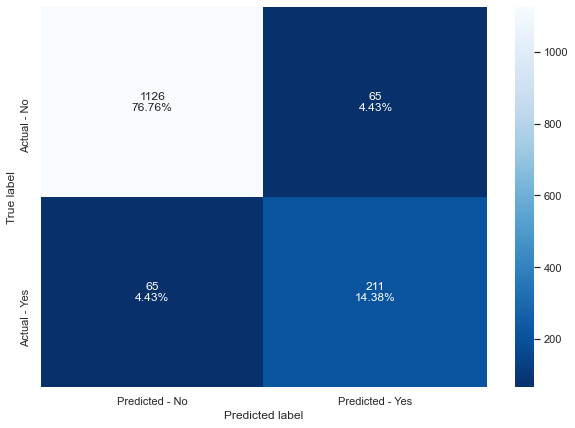

In [99]:
# Decision tree confusion matrix for test set
printmd('**DecisionTree Confusion Matrix for Test set:**')
make_confusion_matrix(DTC_model,y_test)

In [100]:
printmd('**DecisionTree Performance Metrics for Train and Test set:**')
dtcl_acc = get_accuracy_score(DTC_model)
dtcl_precision = get_precision_score(DTC_model)
dtcl_recall = get_recall_score(DTC_model)
dtcl_f1_score = get_f1_score(DTC_model)
dtcl_auc_score = get_auc_score(DTC_model)

**DecisionTree Performance Metrics for Train and Test set:**

Accuracy on training set :  1.0
Accuracy on test set :  0.91
Precision on training set :  1.0
Precision on test set :  0.76
Recall on training set :  1.0
Recall on test set :  0.76
F1_score on training set :  1.0
F1_score on test set :  0.76
AUC_score on training set :  1.0
AUC_score on test set :  0.85


**DecisionTree ROC_Curve for Test set:**

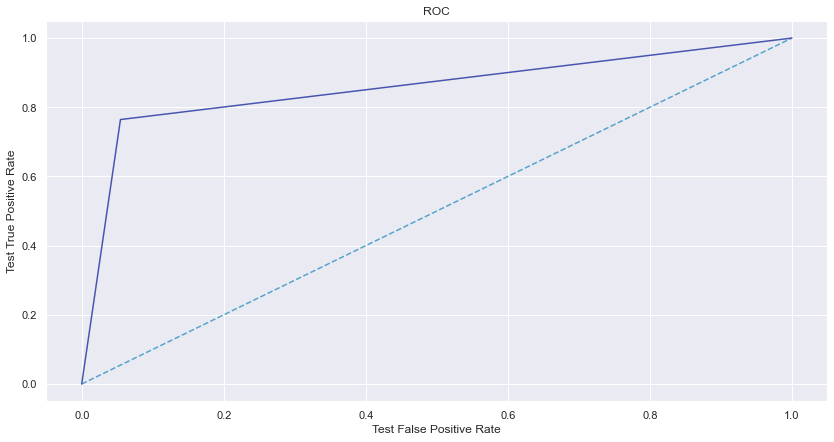

In [101]:
printmd('**DecisionTree ROC_Curve for Test set:**')
get_roc_curve(DTC_model)

### Model Interpretation

**From the above results we can conclude decision tree is an over-fitting model.**

## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"><a id = "link12"></a> 1d. Random Forest without hyper-parameter tuning

### Model Building

In [102]:
# Initialise a Random Forest Classifier without passing any hyperparameters:
rf = RandomForestClassifier(class_weight = 'balanced', random_state=1)

# Fit the model:
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

In [103]:
# Training Data Class Prediction with a cut-off value of 0.5
ytrain_predict_rf = rf.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
ytest_predict_rf = rf.predict(X_test)

In [104]:
# Top 10 Variable Importance
printmd('**Top 10 Feature Importance for RandomForest**')
print (pd.DataFrame(rf.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False).head(10))

**Top 10 Feature Importance for RandomForest**

                                        Imp
Age                                0.128122
MonthlyIncome                      0.127000
DurationOfPitch                    0.113221
Passport_1                         0.077548
CityTier_3                         0.038772
Gender_Male                        0.031266
PreferredLoginDevice_Self Enquiry  0.028920
PreferredPropertyStar_5.0          0.028108
MaritalStatus_Single               0.027869
OwnCar_1                           0.026288


### Model Evaluation - Performance Metric

**Random Forest Confusion Matrix for Test set:**

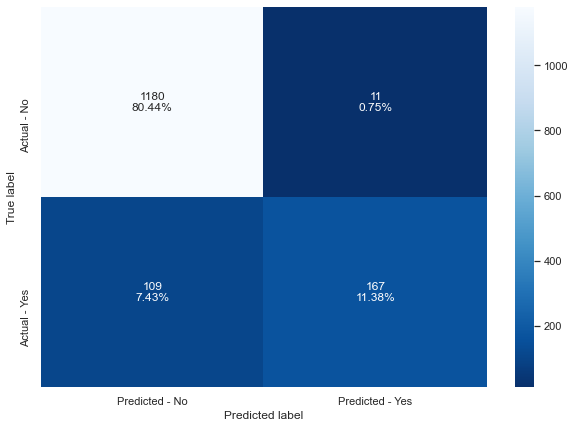

In [105]:
# Radom Forest confusion matrix for test set
printmd('**Random Forest Confusion Matrix for Test set:**')
make_confusion_matrix(rf,y_test)

In [106]:
printmd('**RandomForest Performance Metrics for Train and Test set:**')
rf_acc = get_accuracy_score(rf)
rf_precision = get_precision_score(rf)
rf_recall = get_recall_score(rf)
rf_f1_score = get_f1_score(rf)
rf_auc_score = get_auc_score(rf)

**RandomForest Performance Metrics for Train and Test set:**

Accuracy on training set :  1.0
Accuracy on test set :  0.92
Precision on training set :  1.0
Precision on test set :  0.94
Recall on training set :  1.0
Recall on test set :  0.61
F1_score on training set :  1.0
F1_score on test set :  0.74
AUC_score on training set :  1.0
AUC_score on test set :  0.98


**RandomForest ROC_Curve for Test set:**

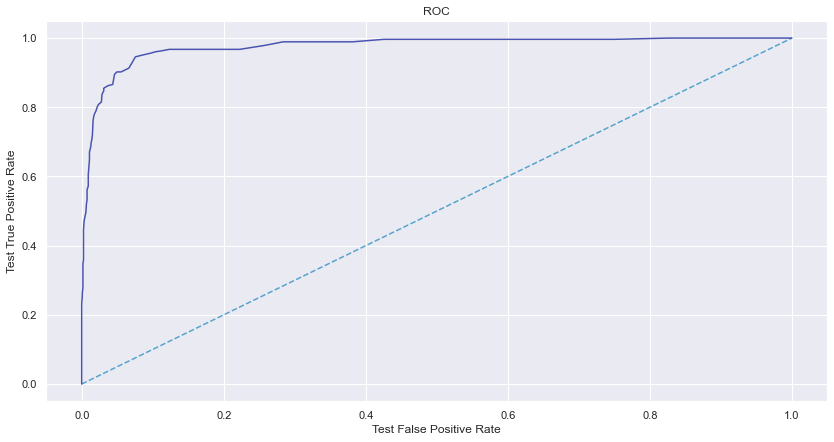

In [107]:
printmd('**RandomForest ROC_Curve for Test set:**')
get_roc_curve(rf)

### Model Interpretation

* **From the above results we can conclude random forest is an overfitting model.**

## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"><a id = "link13"></a> 2a. LR with hyperparameter tuning

### Model Building - Logistic Regression - Tuning

In [108]:
# Create instance for logistic regression
LR_model = LogisticRegression(class_weight = 'balanced', random_state=1)

# Create parameter grid to identify best parameters for logistic regression model:
LR_param_grid ={'penalty':['l2'], # 'none','l1','elasticnet'
      'solver':['newton-cg'], # 'sag','lbfgs','saga','liblinear'
      'max_iter':[100], # ,500
      'tol':[0.01] # ,0.001,0.0001
     }

# Type of scoring used to compare parameter combinations
score_1 = make_scorer(recall_score)

# Cross-validation
skf_1 = StratifiedKFold(n_splits=10)

#Perform gridsearch:
LR_grid_search = GridSearchCV(estimator = LR_model, param_grid = LR_param_grid, scoring=score_1, cv = skf_1, n_jobs=-1)

# fit training dataset into it:
LR_grid_search = LR_grid_search.fit(X_train, y_train)

In [109]:
#Best parameter/estimators of logistic regression:
LR_grid_search

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=1),
             n_jobs=-1,
             param_grid={'max_iter': [100], 'penalty': ['l2'],
                         'solver': ['newton-cg'], 'tol': [0.01]},
             scoring=make_scorer(recall_score))

### Model Evaluation - Performance Metric

**Tuned LR Confusion Matrix for Test set:**

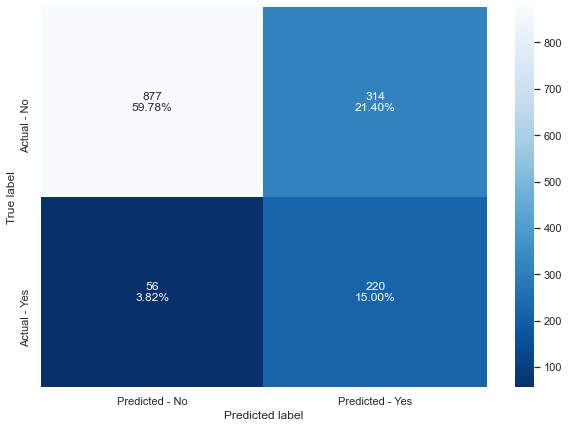

In [110]:
# LR confusion matrix for test set
printmd('**Tuned LR Confusion Matrix for Test set:**')
make_confusion_matrix(LR_grid_search,y_test)

In [111]:
printmd('**Tuned LR Performance Metrics for Train and Test set:**')
Tuned_LR_acc = get_accuracy_score(LR_grid_search)
Tuned_LR_precision = get_precision_score(LR_grid_search)
Tuned_LR_recall = get_recall_score(LR_grid_search)
Tuned_LR_f1_score = get_f1_score(LR_grid_search)
Tuned_LR_auc_score = get_auc_score(LR_grid_search)

**Tuned LR Performance Metrics for Train and Test set:**

Accuracy on training set :  0.73
Accuracy on test set :  0.8
Precision on training set :  0.38
Precision on test set :  0.41
Recall on training set :  0.73
Recall on test set :  0.8
F1_score on training set :  0.5
F1_score on test set :  0.54
AUC_score on training set :  0.8
AUC_score on test set :  0.83


**LR ROC_Curve for Test set:**

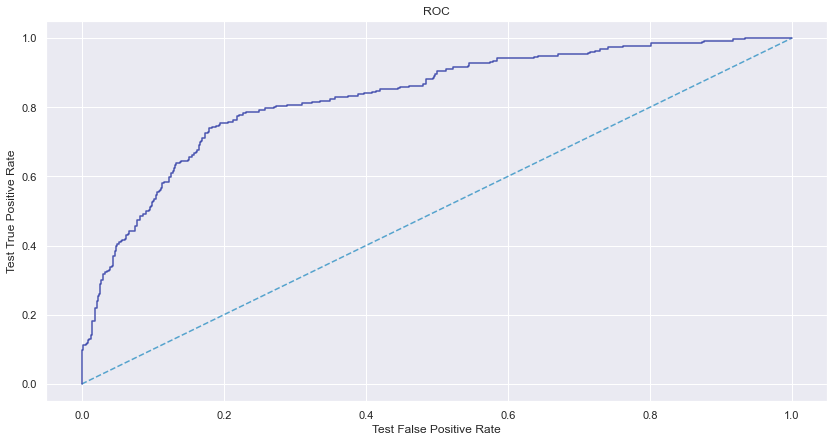

In [112]:
printmd('**LR ROC_Curve for Test set:**')
get_roc_curve(LR_grid_search)

### Model Interpretation

**No major changes found For Logistic regression model after tuning overall remains same.** 

## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"><a id = "link14"></a> 2b. Decision tree with hyperparameter tuning

### Model Building

* **Build DecisionTreeClassifier using gridsearch.** 

In [113]:
# Choose the type of classifier. 
DTCL_model = DecisionTreeClassifier(criterion = 'gini', class_weight= 'balanced',random_state=1)

# Grid of parameters to choose from
DTCL_param_grid = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 10, 15],
              'max_leaf_nodes' : [10], # 2, 3, 5,15
              'min_impurity_decrease': [0.0001] # ,0.001,0.01,0.1
             }

# Type of scoring used to compare parameter combinations
score_2 = make_scorer(recall_score)

# Cross-validation
skf_2 = StratifiedKFold(n_splits=10)

# Perform gridsearch:
dtcl_grid_search = GridSearchCV(estimator = DTCL_model, param_grid = DTCL_param_grid, scoring=score_2, cv = skf_2)

# fit training dataset into it:
dtcl_grid_search = dtcl_grid_search.fit(X_train, y_train)

In [114]:
dtcl_grid_search

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=1),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'max_leaf_nodes': [10],
                         'min_impurity_decrease': [0.0001],
                         'min_samples_leaf': [1, 2, 5, 10, 15]},
             scoring=make_scorer(recall_score))

### Model Evaluation - Performance Metric

**Tuned DecisionTree Confusion Matrix for Test set:**

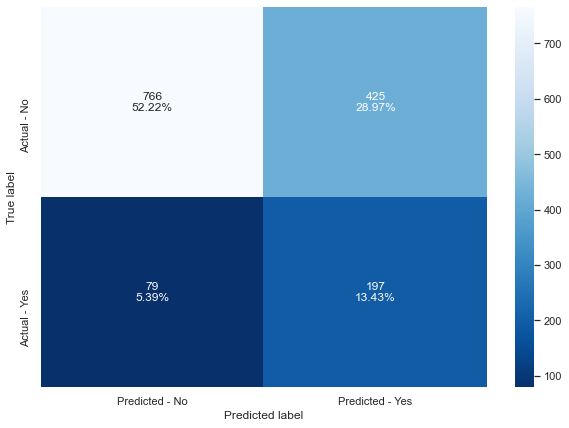

In [115]:
# Tuned Decision tree confusion matrix for test set
printmd('**Tuned DecisionTree Confusion Matrix for Test set:**')
make_confusion_matrix(dtcl_grid_search,y_test)

In [116]:
printmd('**Tuned DecisionTree Performance Metrics for Train and Test set:**')
tuned_dtcl_acc = get_accuracy_score(dtcl_grid_search)
tuned_dtcl_precision = get_precision_score(dtcl_grid_search)
tuned_dtcl_recall = get_recall_score(dtcl_grid_search)
tuned_dtcl_f1_score = get_f1_score(dtcl_grid_search)
tuned_dtcl_auc_score = get_auc_score(dtcl_grid_search)

**Tuned DecisionTree Performance Metrics for Train and Test set:**

Accuracy on training set :  0.68
Accuracy on test set :  0.71
Precision on training set :  0.3
Precision on test set :  0.32
Recall on training set :  0.68
Recall on test set :  0.71
F1_score on training set :  0.42
F1_score on test set :  0.44
AUC_score on training set :  0.7
AUC_score on test set :  0.73


**Tuned DecisionTree ROC_Curve for Test set:**

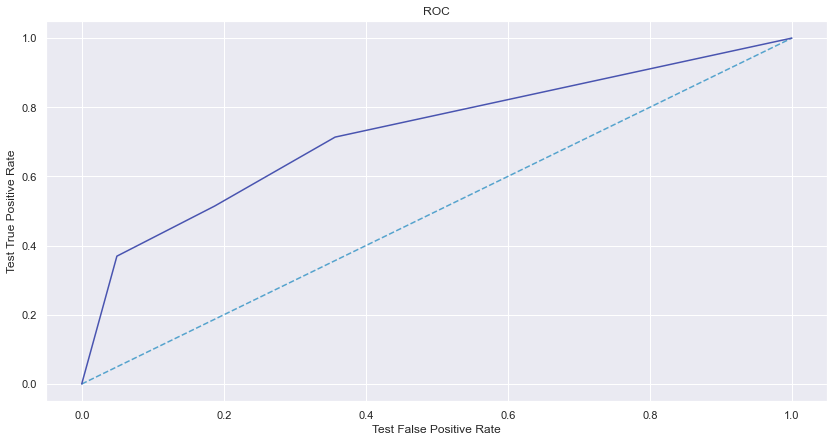

In [117]:
printmd('**Tuned DecisionTree ROC_Curve for Test set:**')
get_roc_curve(dtcl_grid_search)

### Model Interpretation

* **After tuning decision tree overfitting has been removed, but values of precision and recall on both train and test set is very low.**
* **Overall accuracy of the model is good.**

## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"><a id = "link15"></a> 2c. Random Forest with hyperparameter tuning

### Model Building

In [118]:
# Choose the type of classifier. 
RF_model = RandomForestClassifier(class_weight= 'balanced',random_state=1)

# Grid of parameters to choose from
RF_param_grid = {"n_estimators": [110],# ,251,501
                 "min_samples_leaf": np.arange(1, 6,1),
                 "max_features": ['log2'],# 0.7,0.9,'auto'
                 "max_samples": [0.7,0.9,None]
                }

# Type of scoring used to compare parameter combinations
score_3 = make_scorer(recall_score)

# Cross-validation
skf_3 = StratifiedKFold(n_splits=10)

# Perform gridsearch:
RF_grid_search = GridSearchCV(estimator = RF_model, param_grid = RF_param_grid, scoring=score_3, cv = skf_3, n_jobs=-1)

# fit training dataset into it:
RF_grid_search = RF_grid_search.fit(X_train, y_train)

In [119]:
RF_grid_search

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=1),
             n_jobs=-1,
             param_grid={'max_features': ['log2'],
                         'max_samples': [0.7, 0.9, None],
                         'min_samples_leaf': array([1, 2, 3, 4, 5]),
                         'n_estimators': [110]},
             scoring=make_scorer(recall_score))

### Model Evaluation - Performance Metric

**Tuned RandomForest Confusion Matrix for Test set:**

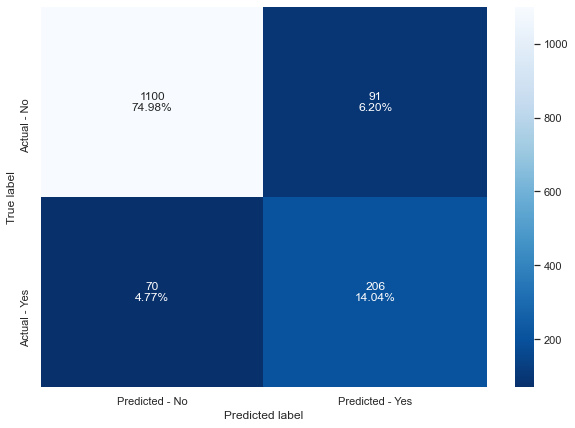

In [120]:
# Tuned Random Forest confusion matrix for test set
printmd('**Tuned RandomForest Confusion Matrix for Test set:**')
make_confusion_matrix(RF_grid_search,y_test)

In [121]:
printmd('**Tuned Random Forest Performance Metrics for Train and Test set:**')
tuned_rf_acc = get_accuracy_score(RF_grid_search)
tuned_rf_precision = get_precision_score(RF_grid_search)
tuned_rf_recall = get_recall_score(RF_grid_search)
tuned_rf_f1_score = get_f1_score(RF_grid_search)
tuned_rf_auc_score = get_auc_score(RF_grid_search)

**Tuned Random Forest Performance Metrics for Train and Test set:**

Accuracy on training set :  0.96
Accuracy on test set :  0.75
Precision on training set :  0.79
Precision on test set :  0.69
Recall on training set :  0.96
Recall on test set :  0.75
F1_score on training set :  0.87
F1_score on test set :  0.72
AUC_score on training set :  0.99
AUC_score on test set :  0.93


**Tuned Random Forest ROC_Curve for Test set:**

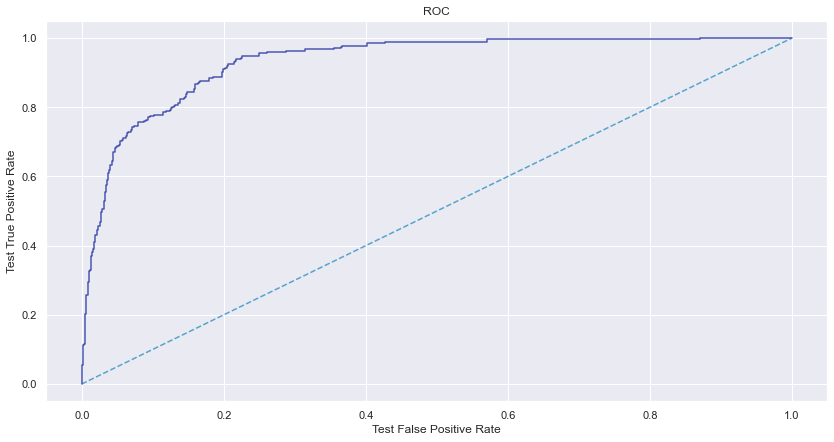

In [122]:
printmd('**Tuned Random Forest ROC_Curve for Test set:**')
get_roc_curve(RF_grid_search)

### Model Interpretation

* **After tuning Random forest, Overfiiting could not be removed.**

## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"><a id = "link16"></a> Comparing all Models for Decision Tree, Random Forest and Bagging Classifier with and without Tuning

In [123]:
# defining list of models
models = [Lr,LDA,DTC_model,rf,LR_grid_search,dtcl_grid_search,RF_grid_search]
# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
F1_train = []
F1_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
    # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])
    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])
    m = get_f1_score(model,False)
    F1_train.append(l[0])
    F1_test.append(l[1])

In [124]:
printmd('**Model Comparison**')
comparison_frame = pd.DataFrame({'Model':['LR','LDA','Decision Tree','Random Forest',
                                          'LR Tuned','Decision Tree Tuned','Random Forest_tuned'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_F1':F1_train,
                                          'Test_F1':F1_test
                                          }) 

comparison_frame

**Model Comparison**

,Model,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall,Train_F1,Test_F1
0,LR,0.71,0.73,0.36,0.39,0.72,0.78,0.36,0.39
1,LDA,0.84,0.85,0.67,0.70,0.33,0.34,0.67,0.70
2,Decision Tree,1.00,0.91,1.00,0.76,1.00,0.76,1.00,0.76
3,Random Forest,1.00,0.92,1.00,0.94,1.00,0.61,1.00,0.94
4,LR Tuned,0.73,0.80,0.38,0.41,0.73,0.80,0.38,0.41
5,Decision Tree Tuned,0.68,0.71,0.30,0.32,0.68,0.71,0.30,0.32
6,Random Forest_tuned,0.96,0.75,0.79,0.69,0.96,0.75,0.79,0.69


**LR model has been a better model compared to rest of the above models**

## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"><a id = "link17"></a> Ensemble Modeling 

**Perform following models**

1. **Bagging Classifier with base estimator decision tree**
2. **Bagging Classifier with base estimator Random Forest**
3. **Adaptive Boosting**
4. **Gradient Boosting**
5. **XGBoost**

## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"><a id = "link18"></a>3a. Ensemble Modeling Bagging and Boosting without hyper-parameter tuning 

### Model Building - Bagging Classifier

In [125]:
# Initialise a Bagging Classifier without passing any hyperparameters:
bagging = BaggingClassifier(random_state=1)

# Fit the model:
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [126]:
# Training Data Class Prediction with a cut-off value of 0.5
ytrain_predict_bg = bagging.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
ytest_predict_bg = bagging.predict(X_test)

### Model Evaluation - Performance Metric

**BaggingClassifier Confusion Matrix for Test set:**

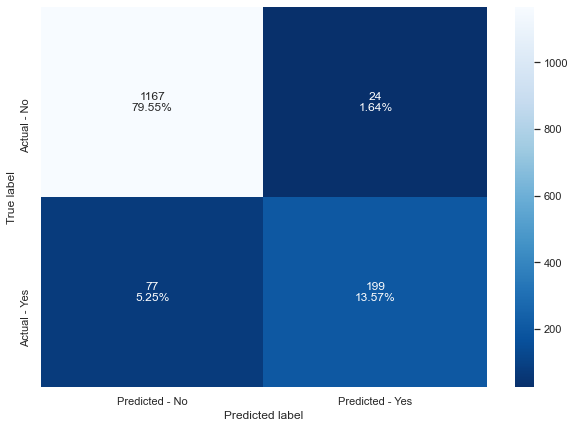

In [127]:
# Bagging confusion matrix for test set
printmd('**BaggingClassifier Confusion Matrix for Test set:**')
make_confusion_matrix(bagging,y_test)

In [128]:
printmd('**Bagging Classifier Performance Metrics for Train and Test set:**')
bg_acc = get_accuracy_score(bagging)
bg_precision = get_precision_score(bagging)
bg_recall = get_recall_score(bagging)
bg_f1_score = get_f1_score(bagging)
bg_auc_score = get_auc_score(bagging)

**Bagging Classifier Performance Metrics for Train and Test set:**

Accuracy on training set :  1.0
Accuracy on test set :  0.93
Precision on training set :  1.0
Precision on test set :  0.89
Recall on training set :  0.98
Recall on test set :  0.72
F1_score on training set :  0.99
F1_score on test set :  0.8
AUC_score on training set :  1.0
AUC_score on test set :  0.95


**Bagging Classifier ROC_Curve for Test set:**

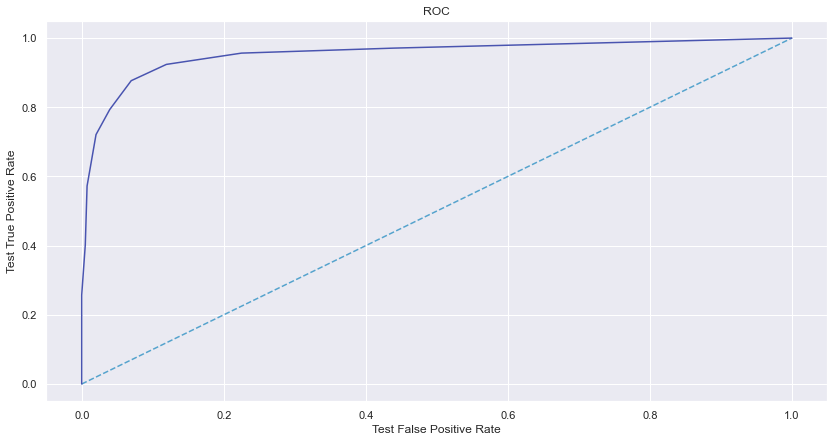

In [129]:
printmd('**Bagging Classifier ROC_Curve for Test set:**')
get_roc_curve(bagging)

### Model Interpretation

**Bagging classifier model is an over-fit model.**

### Model Building - Bagging Classifier with base estimator Decision tree

In [130]:
# Initialise a Bagging Classifier with base estimator - weighted Decision tree:
bagging_dtcl = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight= 'balanced',random_state=1),random_state=1)

# Fit the model:
bagging_dtcl.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                        random_state=1),
                  random_state=1)

In [131]:
# Training Data Class Prediction with a cut-off value of 0.5
ytrain_predict_bg_dtcl = bagging_dtcl.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
ytest_predict_bg_dtcl = bagging_dtcl.predict(X_test)

### Model Evaluation - Performance Metric

**Bagging Classifier with base estimator Decision tree Confusion Matrix for Test set:**

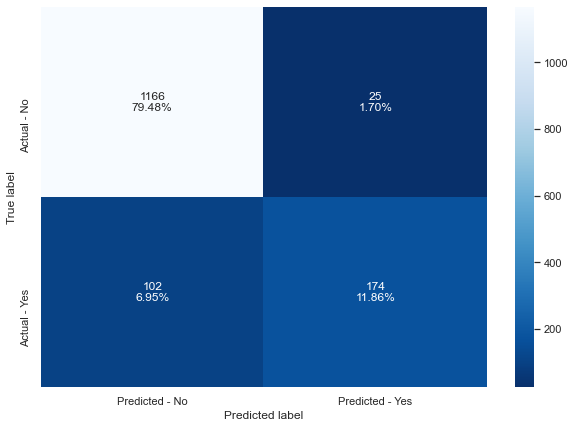

In [132]:
# Bagging classifier with decision tree confusion matrix for test set
printmd('**Bagging Classifier with base estimator Decision tree Confusion Matrix for Test set:**')
make_confusion_matrix(bagging_dtcl,y_test)

In [133]:
printmd('**Bagging Classifier with base estimator Decision tree Performance Metrics for Train and Test set:**')
bg_dtcl_acc = get_accuracy_score(bagging_dtcl)
bg_dtcl_precision = get_precision_score(bagging_dtcl)
bg_dtcl_recall = get_recall_score(bagging_dtcl)
bg_dtcl_f1_score = get_f1_score(bagging_dtcl)
bg_dtcl_auc_score = get_auc_score(bagging_dtcl)

**Bagging Classifier with base estimator Decision tree Performance Metrics for Train and Test set:**

Accuracy on training set :  0.99
Accuracy on test set :  0.91
Precision on training set :  1.0
Precision on test set :  0.87
Recall on training set :  0.98
Recall on test set :  0.63
F1_score on training set :  0.99
F1_score on test set :  0.73
AUC_score on training set :  1.0
AUC_score on test set :  0.94


**Bagging Classifier with base estimator Decision tree ROC_Curve for Test set:**

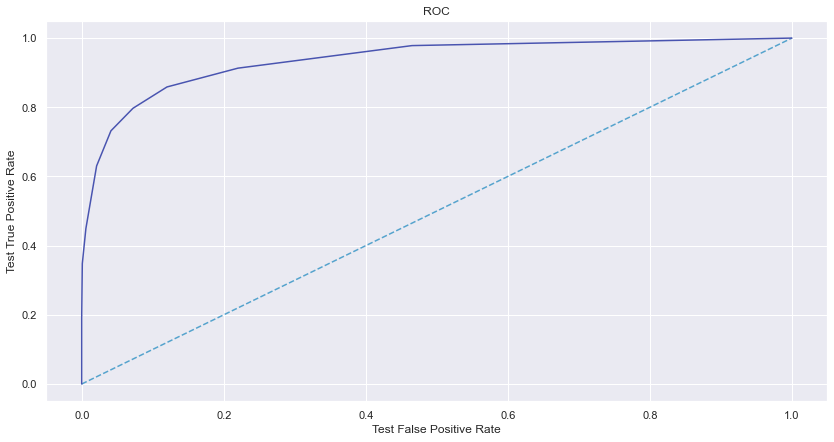

In [134]:
printmd('**Bagging Classifier with base estimator Decision tree ROC_Curve for Test set:**')
get_roc_curve(bagging_dtcl)

### Model Interpretation

**Bagging classifier with base estimator decision tree is an overfit model.**

### Model Building - Bagging classifier with base estimator Random Forest

In [135]:
# Initialise a Bagging Classifier with base estimator - weighted Random Forest:
bagging_rf = BaggingClassifier(base_estimator=RandomForestClassifier(class_weight= 'balanced',random_state=1),random_state=1)

# Fit the model:
bagging_rf.fit(X_train,y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(class_weight='balanced',
                                                        random_state=1),
                  random_state=1)

In [136]:
# Training Data Class Prediction with a cut-off value of 0.5
ytrain_predict_bg_rf = bagging_rf.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
ytest_predict_bg_rf = bagging_rf.predict(X_test)

### Model Evaluation - Performance Metric

**Bagging Classifier with base estimator Random Forest Confusion Matrix for Test set:**

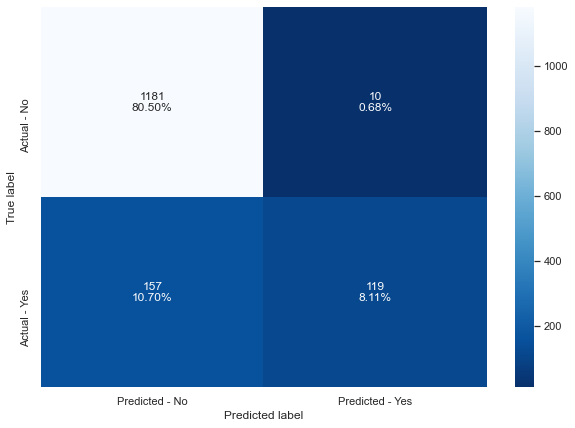

In [137]:
# Bagging classifier with decision tree confusion matrix for test set
printmd('**Bagging Classifier with base estimator Random Forest Confusion Matrix for Test set:**')
make_confusion_matrix(bagging_rf,y_test)

In [138]:
printmd('**Bagging Classifier with base estimator Random Forest Performance Metrics for Train and Test set:**')
bg_rf_acc = get_accuracy_score(bagging_rf)
bg_rf_precision = get_precision_score(bagging_rf)
bg_rf_recall = get_recall_score(bagging_rf)
bg_rf_f1_score = get_f1_score(bagging_rf)
bg_rf_auc_score = get_auc_score(bagging_rf)

**Bagging Classifier with base estimator Random Forest Performance Metrics for Train and Test set:**

Accuracy on training set :  0.99
Accuracy on test set :  0.89
Precision on training set :  1.0
Precision on test set :  0.92
Recall on training set :  0.93
Recall on test set :  0.43
F1_score on training set :  0.96
F1_score on test set :  0.59
AUC_score on training set :  1.0
AUC_score on test set :  0.97


**Bagging Classifier with base estimator Random Forest ROC_Curve for Test set:**

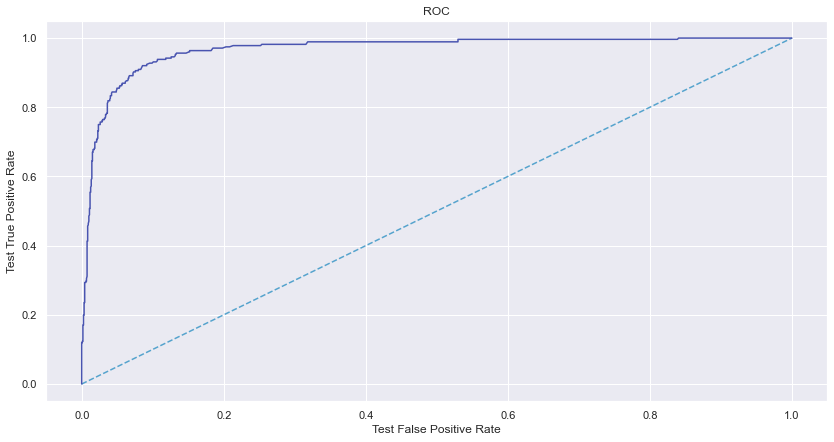

In [139]:
printmd('**Bagging Classifier with base estimator Random Forest ROC_Curve for Test set:**')
get_roc_curve(bagging_rf)

### Model Interpretation

**Bagging classifier with base estimator Random forest is an overfit model.**

### Model Building - Ada boost

In [140]:
# Initialise a AdaBoost Classifier without hyper parametes:
AdaBoost = AdaBoostClassifier(random_state=1)

# Fit the model:
AdaBoost.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [141]:
# Training Data Class Prediction with a cut-off value of 0.5
ytrain_predict_ada = AdaBoost.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
ytest_predict_ada = AdaBoost.predict(X_test)

### Model Evaluation - Performance Metric

**Ada Boost Confusion Matrix for Test set:**

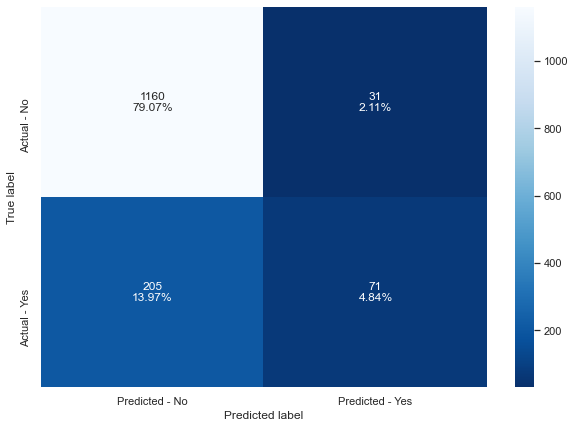

In [142]:
# Ada Boost classifier confusion matrix for test set
printmd('**Ada Boost Confusion Matrix for Test set:**')
make_confusion_matrix(AdaBoost,y_test)

In [143]:
printmd('**Ada Boost Performance Metrics for Train and Test set:**')
Ada_acc = get_accuracy_score(AdaBoost)
Ada_precision = get_precision_score(AdaBoost)
Ada_recall = get_recall_score(AdaBoost)
Ada_f1_score = get_f1_score(AdaBoost)
tuned_dtcl_auc_score = get_auc_score(AdaBoost)

**Ada Boost Performance Metrics for Train and Test set:**

Accuracy on training set :  0.84
Accuracy on test set :  0.84
Precision on training set :  0.69
Precision on test set :  0.7
Recall on training set :  0.27
Recall on test set :  0.26
F1_score on training set :  0.38
F1_score on test set :  0.38
AUC_score on training set :  0.82
AUC_score on test set :  0.82


**Ada Boost ROC_Curve for Test set:**

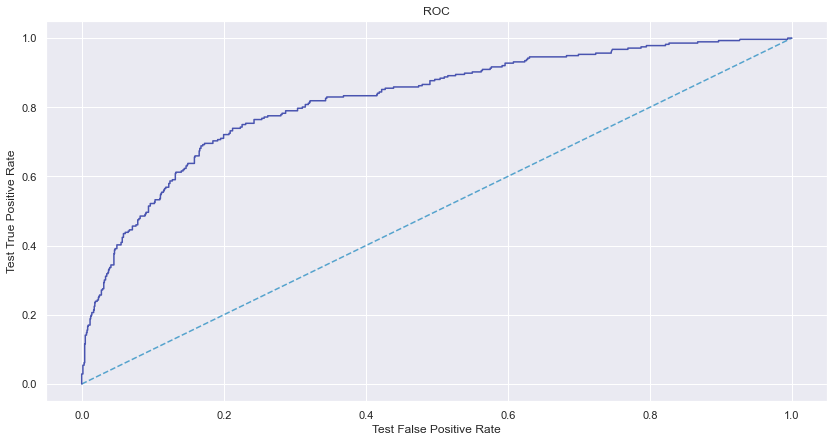

In [144]:
printmd('**Ada Boost ROC_Curve for Test set:**')
get_roc_curve(AdaBoost)

### Model Interpretation

**Ada Boost classifier has a better accuracy and a better precision. Overall the model is good.**

### Model Building - Gradient boost

In [145]:
# Initialise a GradientBoost Classifier without hyper parametes:
gbc = GradientBoostingClassifier(random_state=1)

# Fit the model:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [146]:
# Training Data Class Prediction with a cut-off value of 0.5
ytrain_predict_gbc = gbc.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
ytest_predict_gbc = gbc.predict(X_test)

### Model Evaluation - Performance Metric

**Gradient Boost Confusion Matrix for Test set:**

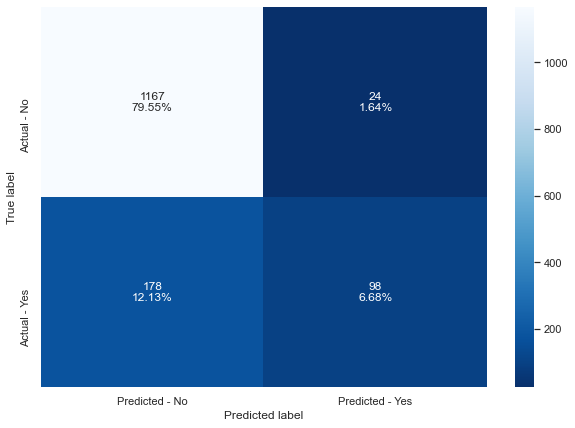

In [147]:
# GradientBoost classifier confusion matrix for test set
printmd('**Gradient Boost Confusion Matrix for Test set:**')
make_confusion_matrix(gbc,y_test)

In [148]:
printmd('**Gradient Boost Performance Metrics for Train and Test set:**')
gbc_acc = get_accuracy_score(gbc)
gbc_precision = get_precision_score(gbc)
gbc_recall = get_recall_score(gbc)
gbc_f1_score = get_f1_score(gbc)
gbc_auc_score = get_auc_score(gbc)

**Gradient Boost Performance Metrics for Train and Test set:**

Accuracy on training set :  0.88
Accuracy on test set :  0.86
Precision on training set :  0.88
Precision on test set :  0.8
Recall on training set :  0.44
Recall on test set :  0.36
F1_score on training set :  0.58
F1_score on test set :  0.49
AUC_score on training set :  0.9
AUC_score on test set :  0.87


**Gradient Boost ROC_Curve for Test set:**

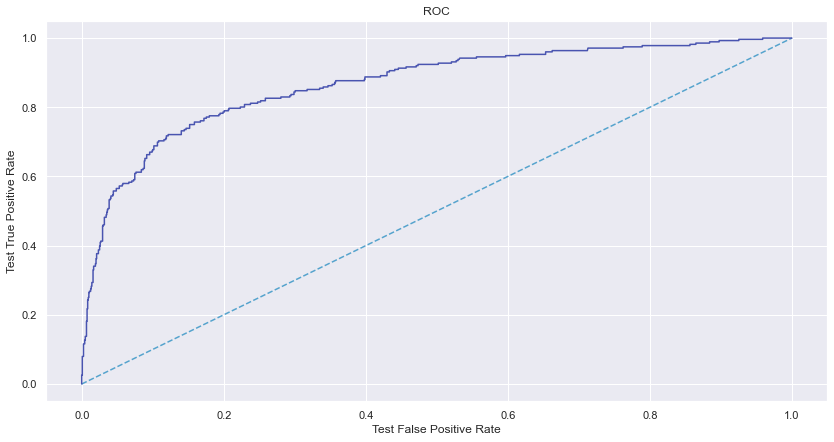

In [149]:
printmd('**Gradient Boost ROC_Curve for Test set:**')
get_roc_curve(gbc)

### Model Interpretation

**Gradient Boost classifier has a better accuracy and a better precision. Overall the model is good.**

### Model Building - GradientBoost - Using AdaBoost classifier as the estimator for intial predictions

In [150]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

### Model Evaluation - Performance Metric

**Gradient Boost Using AdaBoost Confusion Matrix for Test set:**

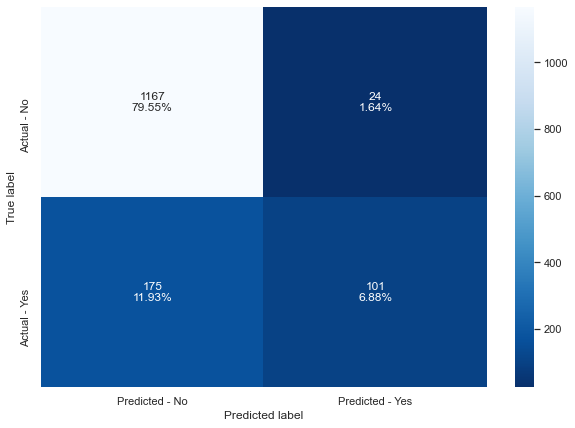

In [151]:
# Tuned GB classifier confusion matrix for test set
printmd('**Gradient Boost Using AdaBoost Confusion Matrix for Test set:**')
make_confusion_matrix(gbc_init,y_test)

In [152]:
printmd('**Gradient Boost Using AdaBoost Performance Metrics for Train and Test set:**')
gbc_init_acc = get_accuracy_score(gbc_init)
gbc_init_precision = get_precision_score(gbc_init)
gbc_init_recall = get_recall_score(gbc_init)
gbc_init_f1_score = get_f1_score(gbc_init)
gbc_init_auc_score = get_auc_score(gbc_init)

**Gradient Boost Using AdaBoost Performance Metrics for Train and Test set:**

Accuracy on training set :  0.88
Accuracy on test set :  0.86
Precision on training set :  0.86
Precision on test set :  0.81
Recall on training set :  0.44
Recall on test set :  0.37
F1_score on training set :  0.58
F1_score on test set :  0.5
AUC_score on training set :  0.9
AUC_score on test set :  0.87


**Gradient Boost Using AdaBoost ROC_Curve for Test set:**

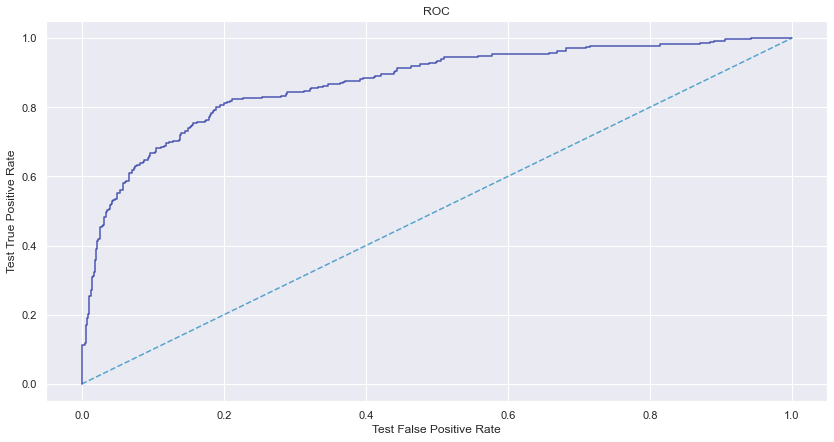

In [153]:
printmd('**Gradient Boost Using AdaBoost ROC_Curve for Test set:**')
get_roc_curve(gbc_init)

### Model Interpretation

**Gradient Boosting with Adaboost as base estimator is giving good predictions and there is no overfitting**

### Model Building - XGBoost

In [154]:
# Initialise a XGBoost Classifier without hyper parametes:
XGB = XGBClassifier(random_state=1)

# Fit the model:
XGB.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [155]:
# Training Data Class Prediction with a cut-off value of 0.5
ytrain_predict_XGB = XGB.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
ytest_predict_XGB = XGB.predict(X_test)

### Model Evaluation - Performance Metric

**XG Boost Confusion Matrix for Test set:**

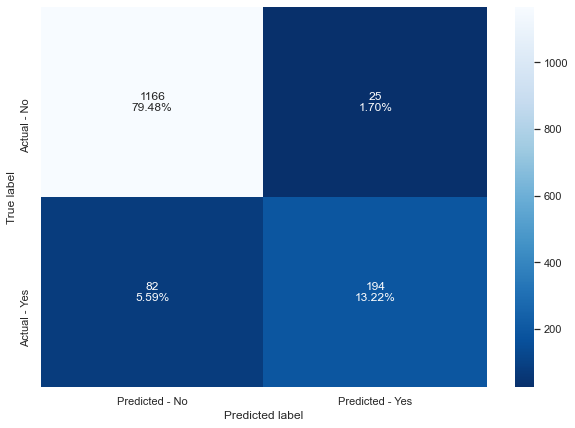

In [156]:
# XGBoost classifier confusion matrix for test set
printmd('**XG Boost Confusion Matrix for Test set:**')
make_confusion_matrix(XGB,y_test)

In [157]:
printmd('**XG Boost Performance Metrics for Train and Test set:**')
XGB_acc = get_accuracy_score(XGB)
XGB_precision = get_precision_score(XGB)
XGB_recall = get_recall_score(XGB)
XGB_f1_score = get_f1_score(XGB)
XGB_auc_score = get_auc_score(XGB)

**XG Boost Performance Metrics for Train and Test set:**

Accuracy on training set :  1.0
Accuracy on test set :  0.93
Precision on training set :  1.0
Precision on test set :  0.89
Recall on training set :  1.0
Recall on test set :  0.7
F1_score on training set :  1.0
F1_score on test set :  0.78
AUC_score on training set :  1.0
AUC_score on test set :  0.95


**XG Boost ROC_Curve for Test set:**

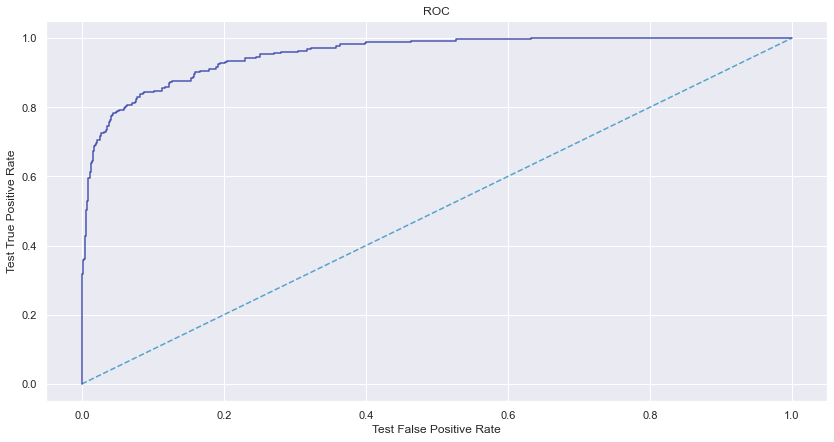

In [158]:
printmd('**XG Boost ROC_Curve for Test set:**')
get_roc_curve(XGB)

### Model Interpretation

**XGBoost classifier has a better accuracy but the model is overfit**

## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"><a id = "link19"></a>3b. Ensemble Modeling Bagging and Boosting with hyper-parameter tuning 

### Model Building - Bagging classifier with base estimator Decision tree

In [159]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(class_weight= 'balanced',random_state=1)

# Grid of parameters to choose from
bg_dt_param_grid = {'base_estimator':[cl1],
              'n_estimators':[101],# 5,7,15,51,
              'max_features': [0.7] # ,0.8,0.9,1
             }

# Type of scoring used to compare parameter combinations
score_4 = make_scorer(recall_score)

# Cross-validation
skf_4 = StratifiedKFold(n_splits=10)

# Perform gridsearch:
bg_dt_grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=bg_dt_param_grid, scoring = score_4, cv = skf_4)

# fit training dataset into it:
bg_dt_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=BaggingClassifier(random_state=1),
             param_grid={'base_estimator': [DecisionTreeClassifier(class_weight='balanced',
                                                                   random_state=1)],
                         'max_features': [0.7], 'n_estimators': [101]},
             scoring=make_scorer(recall_score))

In [160]:
## getting the best estimator
bg_dt_grid  = bg_dt_grid.best_estimator_

In [161]:
# Training Data Class Prediction with a cut-off value of 0.5
ytrain_predict_bg_dtcl_tuned = bg_dt_grid.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
ytest_predict_bg_dtcl_tuned = bg_dt_grid.predict(X_test)

### Model Evaluation - Performance Metric

**Tuned Bagging Classifier with base estimator Decision tree Confusion Matrix for Test set:**

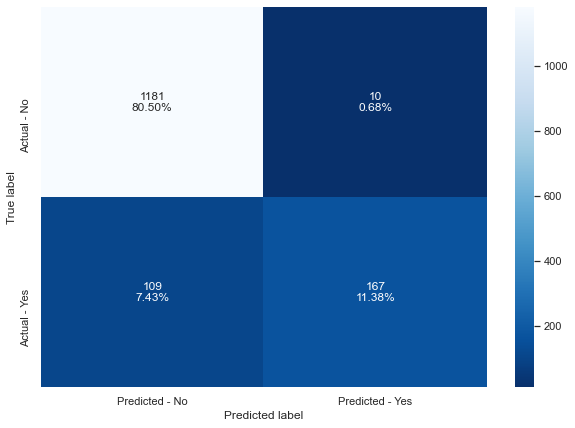

In [162]:
# Tuned Decision tree confusion matrix for test set
printmd('**Tuned Bagging Classifier with base estimator Decision tree Confusion Matrix for Test set:**')
make_confusion_matrix(bg_dt_grid,y_test)

In [163]:
printmd('**Tuned Bagging Classifier with base estimator Decision tree Performance Metrics for Train and Test set:**')
tuned_bg_dtcl_acc = get_accuracy_score(bg_dt_grid)
tuned_bg_dtcl_precision = get_precision_score(bg_dt_grid)
tuned_bg_dtcl_recall = get_recall_score(bg_dt_grid)
tuned_bg_dtcl_f1_score = get_f1_score(bg_dt_grid)
tuned_bg_dtcl_auc_score = get_auc_score(bg_dt_grid)

**Tuned Bagging Classifier with base estimator Decision tree Performance Metrics for Train and Test set:**

Accuracy on training set :  1.0
Accuracy on test set :  0.92
Precision on training set :  1.0
Precision on test set :  0.94
Recall on training set :  1.0
Recall on test set :  0.61
F1_score on training set :  1.0
F1_score on test set :  0.74
AUC_score on training set :  1.0
AUC_score on test set :  0.98


**Tuned Bagging Classifier with base estimator Decision tree ROC_Curve for Test set:**

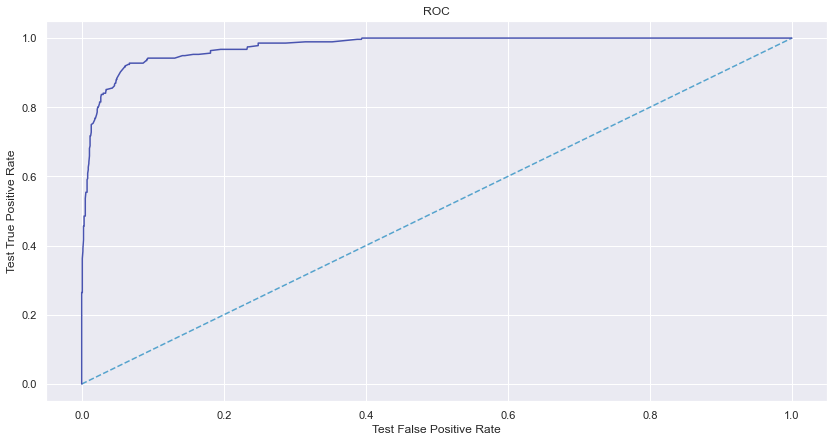

In [164]:
printmd('**Tuned Bagging Classifier with base estimator Decision tree ROC_Curve for Test set:**')
get_roc_curve(bg_dt_grid)

### Model Interpretation

**Tuned bagging classifier with base estimator decision tree has increased accuracy and precision of the model.Overall it is a good model.**

### Model Building - AdaBoost - Hyperparameter tuning

In [165]:
# Choose the type of classifier. 
abc_model = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
abc_param_grid = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(class_weight= 'balanced',max_depth=3)], # DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
    "n_estimators": [100], #np.arange(10,110,10),
    "learning_rate": [0.8] #np.arange(0.1,1,0.1)
}

# Type of scoring used to compare parameter combinations
score_3 = make_scorer(recall_score)

# Cross-validation
skf_3 = StratifiedKFold(n_splits=10)


# Run the grid search
ada_grid_search = GridSearchCV(abc_model, abc_param_grid,scoring = score_3,cv=skf_3)

ada_grid_search = ada_grid_search.fit(X_train, y_train)

### Model Evaluation - Performance Metric

**Tuned Ada Boost Confusion Matrix for Test set:**

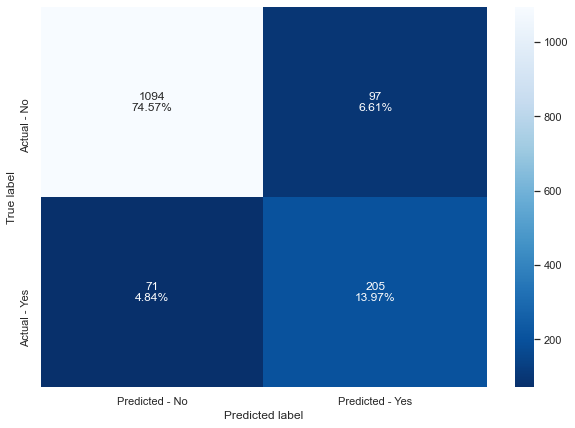

In [166]:
# Tuned Ada Boost classifier confusion matrix for test set
printmd('**Tuned Ada Boost Confusion Matrix for Test set:**')
make_confusion_matrix(ada_grid_search,y_test)

In [167]:
printmd('**Tuned Ada Boost Performance Metrics for Train and Test set:**')
Tuned_ada_acc = get_accuracy_score(ada_grid_search)
Tuned_ada_precision = get_precision_score(ada_grid_search)
Tuned_ada_recall = get_recall_score(ada_grid_search)
Tuned_ada_f1_score = get_f1_score(ada_grid_search)
tuned_ada_auc_score = get_auc_score(ada_grid_search)

**Tuned Ada Boost Performance Metrics for Train and Test set:**

Accuracy on training set :  0.99
Accuracy on test set :  0.74
Precision on training set :  0.89
Precision on test set :  0.68
Recall on training set :  0.99
Recall on test set :  0.74
F1_score on training set :  0.94
F1_score on test set :  0.71
AUC_score on training set :  1.0
AUC_score on test set :  0.87


**Tuned Ada Boost ROC_Curve for Test set:**

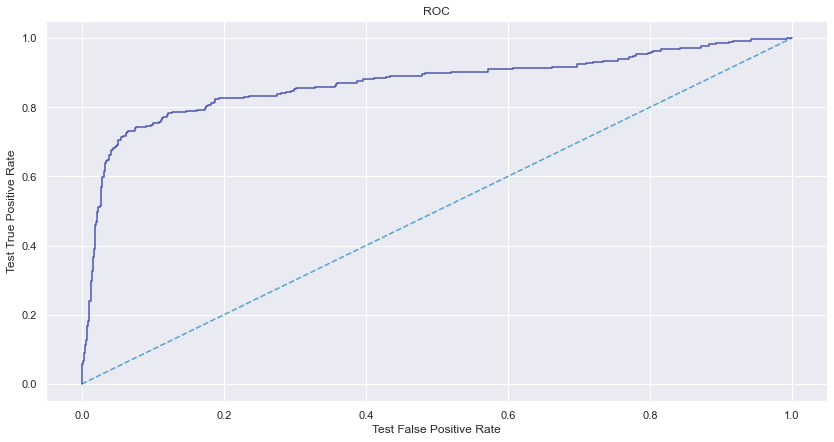

In [168]:
printmd('**Tuned Ada Boost ROC_Curve for Test set:**')
get_roc_curve(ada_grid_search)

### Model Interpretation

**Tuned AdaBoost classifier is an overfit model**

### Model Building - GradientBoost - Hyperparameter tuning

In [169]:
# Choose the type of classifier. 
gbc_model = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
gbc_param_grid = {
    "n_estimators": [250], # 100,150,200,
    "subsample":[1], # 0.8,0.9,
    "max_features":[0.9] # 0.7,0.8,1
}

# Type of scoring used to compare parameter combinations
score_3 = make_scorer(recall_score)

# Cross-validation
skf_3 = StratifiedKFold(n_splits=10)

# Run the grid search
gbc_grid_search = GridSearchCV(gbc_model, gbc_param_grid,scoring = score_3 ,cv=skf_3)

# fit training dataset into it:
gbc_grid_search = gbc_grid_search.fit(X_train, y_train)

### Model Evaluation - Performance Metric

**Tuned Gradient Boost Confusion Matrix for Test set:**

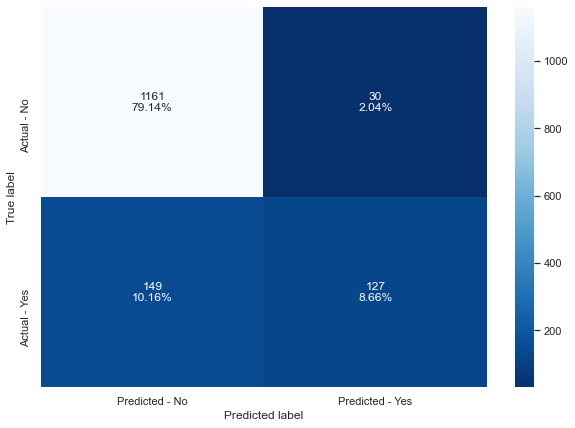

In [170]:
# Tuned GB classifier confusion matrix for test set
printmd('**Tuned Gradient Boost Confusion Matrix for Test set:**')
make_confusion_matrix(gbc_grid_search,y_test)

In [171]:
printmd('**Tuned Gradient Boost Performance Metrics for Train and Test set:**')
Tuned_gbc_acc = get_accuracy_score(gbc_grid_search)
Tuned_gbc_precision = get_precision_score(gbc_grid_search)
Tuned_gbc_recall = get_recall_score(gbc_grid_search)
Tuned_gbc_f1_score = get_f1_score(gbc_grid_search)
Tuned_gbc_auc_score = get_auc_score(gbc_grid_search)

**Tuned Gradient Boost Performance Metrics for Train and Test set:**

Accuracy on training set :  0.59
Accuracy on test set :  0.46
Precision on training set :  0.93
Precision on test set :  0.81
Recall on training set :  0.59
Recall on test set :  0.46
F1_score on training set :  0.73
F1_score on test set :  0.59
AUC_score on training set :  0.95
AUC_score on test set :  0.89


**Tuned Gradient Boost ROC_Curve for Test set:**

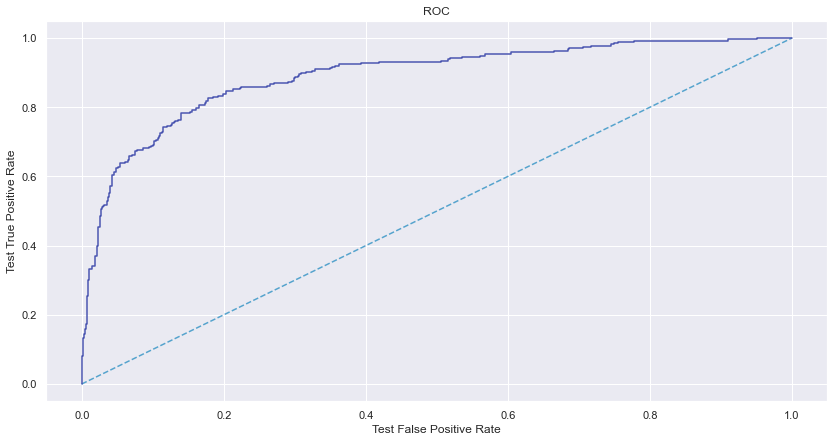

In [172]:
printmd('**Tuned Gradient Boost ROC_Curve for Test set:**')
get_roc_curve(gbc_grid_search)

### Model Interpretation

**Tuned GB classifier has a better accuracy and better precision. Overall a good model.**

### Model Building - XGBoost - Hyperparameter tuning

In [173]:
# Choose the type of classifier. 
xgb_model = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
xgb_param_grid = {
    "n_estimators": [90], #np.arange(30,100,20),
    "subsample":[1], # 0.5,0.7,
    "learning_rate":[0.1], # 0.001,0.01,0.05,
    "colsample_bytree":[1], # 0.5,0.7,
    "colsample_bylevel":[1] # 0.5,0.7,
}

# Type of scoring used to compare parameter combinations
score_3 = make_scorer(recall_score)

# Cross-validation
skf_3 = StratifiedKFold(n_splits=10)

# Run the grid search
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid,scoring = score_3,cv=skf_3)

# fit training dataset into it:
xgb_grid_search = xgb_grid_search.fit(X_train, y_train)

### Model Evaluation - Performance Metric

**Tuned XGBoost Confusion Matrix for Test set:**

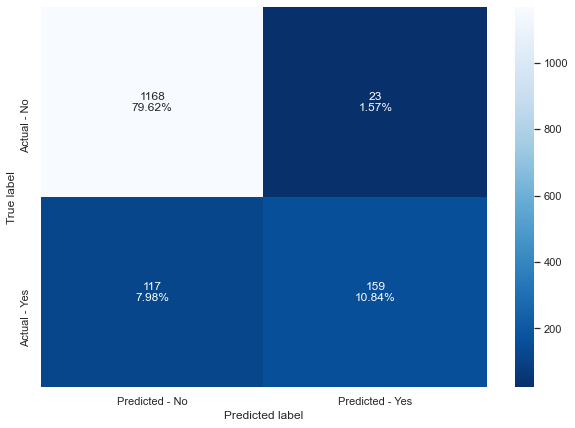

In [174]:
# Tuned XGB classifier confusion matrix for test set
printmd('**Tuned XGBoost Confusion Matrix for Test set:**')
make_confusion_matrix(xgb_grid_search,y_test)

In [175]:
printmd('**Tuned XGBoost Performance Metrics for Train and Test set:**')
Tuned_xgb_acc = get_accuracy_score(xgb_grid_search)
Tuned_xgb_precision = get_precision_score(xgb_grid_search)
Tuned_xgb_recall = get_recall_score(xgb_grid_search)
Tuned_xgb_f1_score = get_f1_score(xgb_grid_search)
Tuned_xgb_auc_score = get_auc_score(xgb_grid_search)

**Tuned XGBoost Performance Metrics for Train and Test set:**

Accuracy on training set :  0.78
Accuracy on test set :  0.58
Precision on training set :  0.99
Precision on test set :  0.87
Recall on training set :  0.78
Recall on test set :  0.58
F1_score on training set :  0.88
F1_score on test set :  0.69
AUC_score on training set :  0.99
AUC_score on test set :  0.93


**Tuned XGBoost ROC_Curve for Test set:**

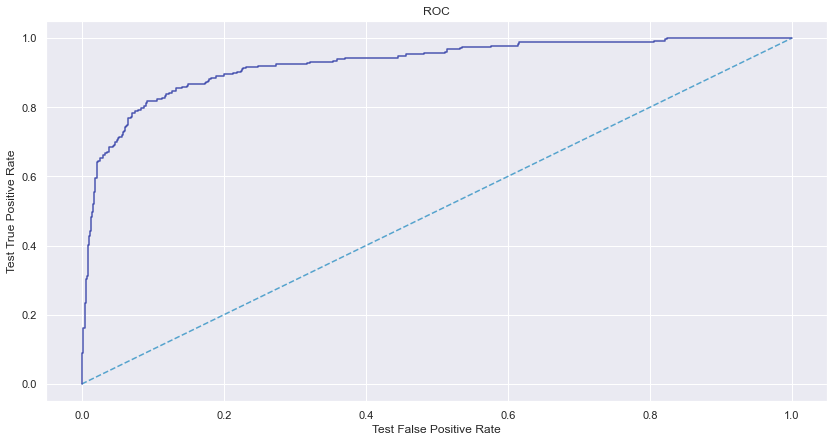

In [176]:
printmd('**Tuned XGBoost ROC_Curve for Test set:**')
get_roc_curve(xgb_grid_search)

### Model Interpretation

**Tuned XGBoost is  overfitting**

## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"><a id = "link20"></a> Interpretation of the most optimum model and its implication on the Business

In [177]:
# defining list of models
models = [Lr,LDA,DTC_model,rf,LR_grid_search,dtcl_grid_search,RF_grid_search,bagging,bagging_dtcl,bagging_rf,
         AdaBoost,gbc,gbc_init,XGB,bg_dt_grid,ada_grid_search,gbc_grid_search,xgb_grid_search]
# defining empty lists to add train and test results
acc_train = []
acc_test = []
pres_train =[]
pres_test =[]
recall_train =[]
recall_test =[]
F1_train = []
F1_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
    # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    k = get_precision_score(model,False)
    pres_train.append(k[0])
    pres_test.append(k[1])
    l = get_recall_score(model,False)
    recall_train.append(l[0])
    recall_test.append(l[1])
    m = get_f1_score(model,False)
    F1_train.append(l[0])
    F1_test.append(l[1])

In [178]:
printmd('**Model Comparison**')
comparison_frame = pd.DataFrame({'Model':['LR','LDA','Decision Tree','Random Forest',
                                          'LR Tuned','Decision Tree Tuned','Random Forest_tuned',
                                          'Bagging','Bagging_DTCL','Bagging_RF','AdaBoost','GradientBoost','GBC_init','XGBOOST',
                                          'Bagging_DTCL_tuned','AdaBoost_tuned','GradientBoost_tuned','XGBoost_tuned'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Precision':pres_train,
                                          'Test_Precision':pres_test,
                                          'Train_Recall':recall_train,
                                          'Test_Recall':recall_test,
                                          'Train_F1':F1_train,
                                          'Test_F1':F1_test}) 
comparison_frame

**Model Comparison**

,Model,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall,Train_F1,Test_F1
0,LR,0.71,0.73,0.36,0.39,0.72,0.78,0.72,0.78
1,LDA,0.84,0.85,0.67,0.70,0.33,0.34,0.33,0.34
2,Decision Tree,1.00,0.91,1.00,0.76,1.00,0.76,1.00,0.76
3,Random Forest,1.00,0.92,1.00,0.94,1.00,0.61,1.00,0.61
4,LR Tuned,0.73,0.80,0.38,0.41,0.73,0.80,0.73,0.80
5,Decision Tree Tuned,0.68,0.71,0.30,0.32,0.68,0.71,0.68,0.71
6,Random Forest_tuned,0.96,0.75,0.79,0.69,0.96,0.75,0.96,0.75
7,Bagging,1.00,0.93,1.00,0.89,0.98,0.72,0.98,0.72
8,Bagging_DTCL,0.99,0.91,1.00,0.87,0.98,0.63,0.98,0.63
9,Bagging_RF,0.99,0.89,1.00,0.92,0.93,0.43,0.93,0.43


**Logistic regression and Decision tree with hyperparameter tuning gave a better results on both train and test.**

### Feature Importance of Decision tree

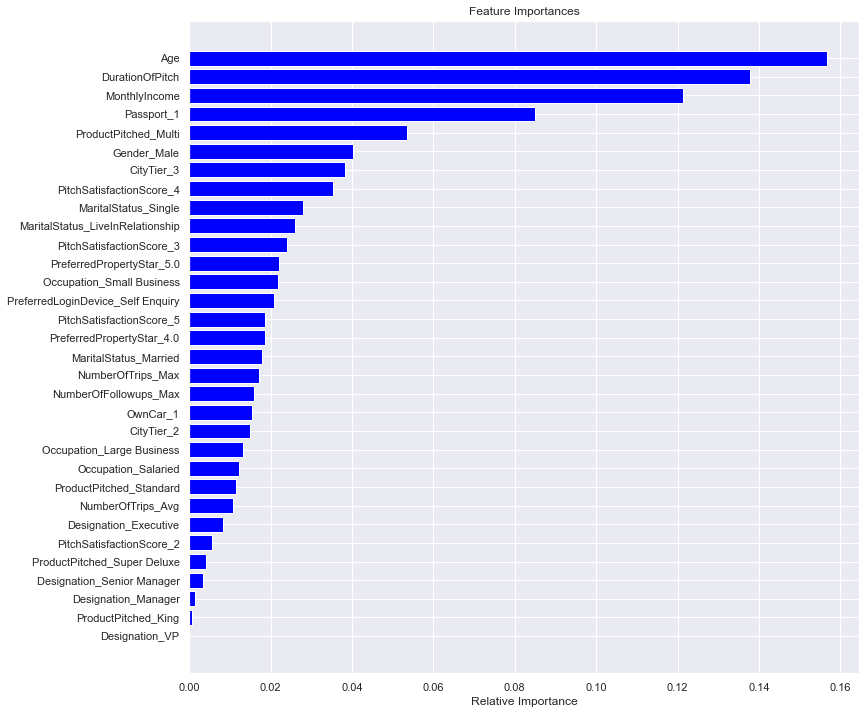

In [179]:
feature_names = X_train.columns
importances = DTC_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Feature Importance of Logistic Regression

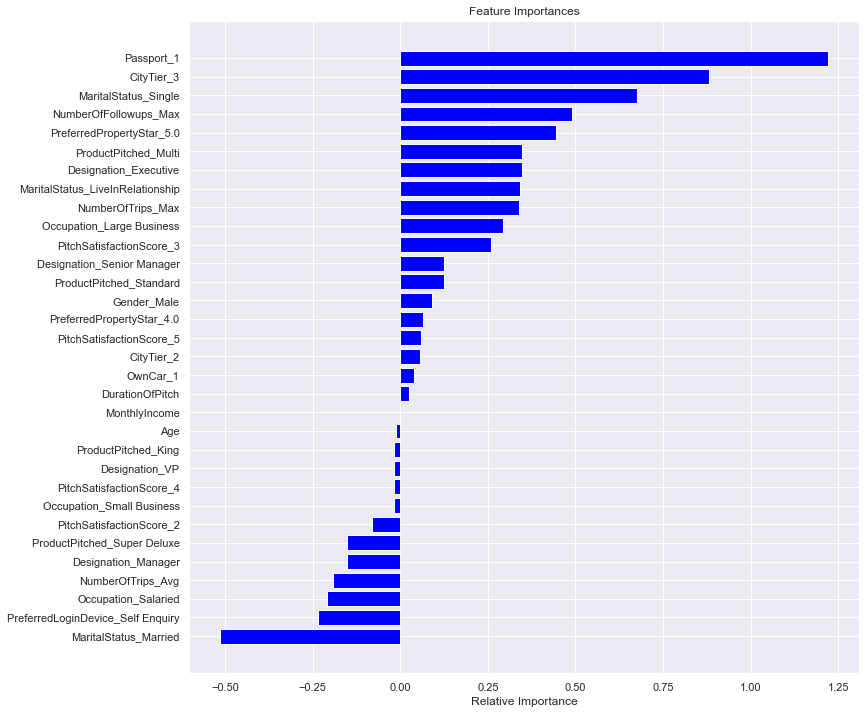

In [180]:
feature_names = X_train.columns
importances = Lr.coef_[0]
indices = np.argsort(importances)#[::-1]

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Thank You